In [1]:
%matplotlib inline
from IPython.display import display, HTML

# Build Data Definitions

In [2]:
import icu_data_defs

In [3]:
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')

In [4]:
data_dict.tables.definitions.head()

,label,units,variable_type,clinical_source,list_id
def_id,,,,,
0,heart rate,beats/min,qn,observation,NaN
1,blood pressure systolic,mmHg,qn,observation,NaN
2,blood pressure diastolic,mmHg,qn,observation,NaN
3,blood pressure mean,mmHg,qn,observation,NaN
4,respiratory rate,insp/min,qn,observation,NaN


In [29]:
inr_id = data_dict.add_definition(label='INR')
pt_id = data_dict.add_definition(label='Prothrombin Time',units='seconds')

In [30]:
data_dict.tables.definitions.tail()

,label,units,variable_type,clinical_source,list_id
def_id,,,,,
23,lactate,mmol/L,qn,observation,NaN
24,lactate,mg/dL,qn,observation,NaN
25,hemoglobin,g/dL,qn,observation,NaN
26,INR,NaN,qn,observation,NaN
27,Prothrombin Time,seconds,qn,observation,NaN


In [31]:
from itertools import product

panel_map = list(product([data_dict.table_names.definitions],[inr_id,pt_id]))
panel_id = data_dict.add_panel('coagulation labs',panel_map)
data_dict.get_panel_defintions(panel_id)

,label,units,variable_type,clinical_source,list_id
def_id,,,,,
26,INR,NaN,qn,observation,NaN
27,Prothrombin Time,seconds,qn,observation,NaN


In [32]:
data_dict.tables.panels

,panel_name,list_id
panel_id,,
0,blood pressure,3
1,vital signs,4
2,urine output,5
3,glasgow coma scale,6
4,normal saline,7
5,lactated ringers,8
6,common fluids,9
7,norepinephrine,10
8,vasopressin,11


In [33]:
data_dict.get_panel_defintions(12)

,label,units,variable_type,clinical_source,list_id
def_id,,,,,
0,heart rate,beats/min,qn,observation,NaN
1,blood pressure systolic,mmHg,qn,observation,NaN
2,blood pressure diastolic,mmHg,qn,observation,NaN
3,blood pressure mean,mmHg,qn,observation,NaN
4,respiratory rate,insp/min,qn,observation,NaN
5,temperature body,degF,qn,observation,NaN
6,oxygen saturation pulse oximetry,percent,qn,observation,NaN
7,weight body,kg,qn,observation,NaN
8,output urine,mL,qn,observation,NaN


In [34]:
data_dict.save()

# MIMIC Exploration

In [1]:
import mimic
from icu_data_defs import data_dictionary

In [2]:
reload(mimic)
conn = mimic.connect()
data_dict = data_dictionary('config/data_definitions.xlsx')
explorer = mimic.explorer(conn)

In [3]:
keep_dict = {}

## Vital Signs

### Heart Rate

In [4]:
out_df = explorer.search([
        'heart rate',
        'beats',
        'bpm',
        'pulse'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
227018,HR_ApacheIV,HR_ApacheIV,chartevents,Scores - APACHE IV (2),bpm,110.000000
223765,Orthostatic HR sitting,Orthostatic HR sitting,chartevents,Routine Vital Signs,bpm,110.000000
1332,pulse,,chartevents,,,110.000000
227581,BiPap bpm (S/T -Back up),BiPap bpm (S/T -Back up),chartevents,Respiratory,bpm,110.000000
220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,110.000000
224363,VAD Beat Rate L,VAD Beat Rate L,chartevents,Hemodynamics,bpm,110.000000
226764,HrApacheIIValue,HrApacheIIValue,chartevents,Scores - APACHE II,bpm,110.000000
1341,PULSE,,chartevents,,,110.000000
220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,110.000000


In [5]:
label = data_dict.labels.HEART_RATE
keep_dict[label] = [211,220045,1341,1725,1332]

### Respiratory Rate

In [66]:
out_df = explorer.search([
        'respiratory rate',
        'resp rate',
        'insp/min',
        'breath/min'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
3603,Resp Rate,,chartevents,,,110.000000
224688,Respiratory Rate (Set),Respiratory Rate (Set),chartevents,Respiratory,insp/min,110.000000
226774,RRApacheIIValue,RRApacheIIValue,chartevents,Scores - APACHE II,insp/min,110.000000
618,Respiratory Rate,,chartevents,,,110.000000
224690,Respiratory Rate (Total),Respiratory Rate (Total),chartevents,Respiratory,insp/min,110.000000
223875,Fspn High,Fspn High,chartevents,Respiratory,insp/min,110.000000
224689,Respiratory Rate (spontaneous),Respiratory Rate (spontaneous),chartevents,Respiratory,insp/min,110.000000
220210,Respiratory Rate,RR,chartevents,Respiratory,insp/min,110.000000
224161,Resp Alarm - High,Resp Alarm - High,chartevents,Alarms,insp/min,110.000000


In [67]:
label = data_dict.labels.RESPIRATORY_RATE
keep_dict[label] = [220210,3603,618,8113]

### Blood Pressure

In [68]:
out_df = explorer.search([
        'blood pressure',
        'systolic',
        'diastolic',
        'mmHg'
    ])
out_df.iloc[0:20]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
224315,ABI Brachial BP L,ABI Brachial BP L,chartevents,IABP,mmHg,110.0
227537,ART Blood Pressure Alarm - High,ART BP Alarm - High,chartevents,Alarms,mmHg,110.0
220181,Non Invasive Blood Pressure mean,NBPm,chartevents,Routine Vital Signs,mmHg,110.0
220180,Non Invasive Blood Pressure diastolic,NBPd,chartevents,Routine Vital Signs,mmHg,110.0
220179,Non Invasive Blood Pressure systolic,NBPs,chartevents,Routine Vital Signs,mmHg,110.0
220074,Central Venous Pressure,CVP,chartevents,Hemodynamics,mmHg,110.0
220073,Central Venous Pressure Alarm - Low,CVP Alarm - Low,chartevents,Alarms,mmHg,110.0
220072,Central Venous Pressure Alarm - High,CVP Alarm - High,chartevents,Alarms,mmHg,110.0
220069,Left Artrial Pressure,LAP,chartevents,Hemodynamics,mmHg,110.0


In [69]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] = [220179]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] = [220180]
out_df.iloc[20:40]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
226063,Venous O2 Pressure,PO2 (Venous),chartevents,Labs,mmHg,110.0
225312,ART BP mean,ART BP mean,chartevents,Routine Vital Signs,mmHg,110.0
225310,ART BP Diastolic,ART BP Diastolic,chartevents,Routine Vital Signs,mmHg,110.0
225309,ART BP Systolic,ART BP Systolic,chartevents,Routine Vital Signs,mmHg,110.0
223751,Non-Invasive Blood Pressure Alarm - High,NBP Alarm - High,chartevents,Alarms,mmHg,110.0
227516,PO2 (Mixed Venous),PO2 (Mixed Venous),chartevents,Labs,mmHg,110.0
224166,Doppler BP,Doppler BP,chartevents,Routine Vital Signs,mmHg,110.0
224167,Manual Blood Pressure Systolic Left,Manual BPs L,chartevents,Routine Vital Signs,mmHg,110.0
226737,AaDO2ApacheIIValue,AaDO2ApacheIIValue,chartevents,Scores - APACHE II,mmHg,110.0


In [70]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [225309,224167]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [225310,224643]
out_df.iloc[40:60]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
227989,Intra Cranial Pressure #2,IC2,chartevents,Hemodynamics,mmHg,110.0
220056,Arterial Blood Pressure Alarm - Low,ABP Alarm - Low,chartevents,Alarms,mmHg,110.0
220052,Arterial Blood Pressure mean,ABPm,chartevents,Routine Vital Signs,mmHg,110.0
220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,110.0
220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,110.0
228145,ABI Ankle BP L,ABI Ankle BP L,chartevents,IABP,mmHg,110.0
228146,ABI Brachial BP R,ABI Brachial BP R,chartevents,IABP,mmHg,110.0
227039,PO2_ApacheIV,PO2_ApacheIV,chartevents,Scores - APACHE IV (2),mmHg,110.0
220765,Intra Cranial Pressure,ICP,chartevents,Hemodynamics,mmHg,110.0


In [71]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [220050]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [220051]
out_df.iloc[60:80]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
223766,Orthostatic BPs standing,Orthostatic BPs standing,chartevents,Routine Vital Signs,mmHg,110.0
228149,ABI Brachial BP L (Impella),ABI Brachial BP L (Impella),chartevents,Impella,mmHg,110.0
224151,Effluent Pressure,Effluent Pressure,chartevents,Dialysis,mmHg,110.0
224643,Manual Blood Pressure Diastolic Left,Manual BPd L,chartevents,Routine Vital Signs,mmHg,110.0
224654,PAEDP,DIA - Unassisted,chartevents,IABP,mmHg,110.0
226855,PCWP (mean) (PA Line),PCWP (mean) (PA Line),chartevents,PA Line Insertion,mmHg,110.0
226857,PA mean pressure (PA Line),PA mean pressure (PA Line),chartevents,PA Line Insertion,mmHg,110.0
224646,Orthostatic BPs sitting,Orthostatic BPs sitting,chartevents,Routine Vital Signs,mmHg,110.0
227716,Cerebral Perfusion Pressure Alarm - High,CPP Alarm - High,chartevents,Alarms,mmHg,110.0


In [72]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [227243]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [227242]
out_df.iloc[80:100]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
228158,Purge Pressure,Purge Pressure,chartevents,Impella,mmHg,110.000000
226852,PA systolic pressure(PA Line),PA systolic pressure(PA Line),chartevents,PA Line Insertion,mmHg,110.000000
224652,Unassisted Systole,SYS - Unassisted,chartevents,IABP,mmHg,110.000000
7643,RVSYSTOLIC,,chartevents,,,102.666667
8441,NBP [Diastolic],,chartevents,,,95.666667
8364,ABP [Diastolic],,chartevents,,,95.666667
8448,PAP [Diastolic],,chartevents,,,95.666667
455,NBP [Systolic],,chartevents,,,94.333333
6,ABP [Systolic],,chartevents,,,94.333333


In [73]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [455,6]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [8441,8364]
out_df.iloc[100:120]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
6417,low pressure,,chartevents,,,84.333333
7133,abd pressure,,chartevents,,,84.333333
6944,LOW PRESSURE,,chartevents,,,84.333333
2027,Low pressure,,chartevents,,,84.333333
6107,Low Pressure,,chartevents,,,84.333333
442,Manual BP [Systolic],,chartevents,,,83.000000
8503,BP Left Arm [Diastolic],,chartevents,,,82.000000
8504,BP Left Leg [Diastolic],,chartevents,,,82.000000
8368,Arterial BP [Diastolic],,chartevents,,,82.000000


In [74]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [3313]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [8502,8440]
out_df.iloc[120:140]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
51466,BLOOD,NaN,labevents,HEMATOLOGY,NaN,78.666667
6127,LO Press,,chartevents,,,78.000000
46780,Bladdar pressure,,inputevents_cv,,,77.000000
1404,Bladder pressure,,chartevents,,,77.000000
993,bladder pressure,,chartevents,,,77.000000
6701,Arterial BP #2 [Systolic],,chartevents,,,77.000000
1411,Bladder Pressure,,chartevents,,,77.000000
996,BLADDER PRESSURE,,chartevents,,,77.000000
44862,BLADDER PRESSURE,,inputevents_cv,Free Form Intake,,77.000000


In [75]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [442,3315,51,3317]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [8368,8503,8504,8507,8506]
out_df.iloc[140:160]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
8446,Orthostatic BP lying [Diastolic],,chartevents,,,73.333333
8445,OrthostatBP standing [Diastolic],,chartevents,,,73.333333
6302,low press,,chartevents,,,72.666667
2562,INTRA ABD PRESSURE,,chartevents,,,72.333333
45682,bladder pressure in,,inputevents_cv,Free Form Intake,,72.333333
7124,Low pressure Alarm,,chartevents,,,72.333333
43744,NS bladder pressure,,inputevents_cv,Free Form Intake,,72.333333
228151,Aortic Pressure Signal - Diastolic,Aortic Pressure Signal - Diastolic,chartevents,Impella,None,72.000000
42735,Intra-abd. Pressure,,inputevents_cv,Free Form Intake,,71.666667


In [76]:
keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC] += [3321,3323]
keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC] += [8555]
keep_dict[data_dict.labels.BLOOD_PRESSURE_MEAN] = [220181,225312,220052]

In [77]:
out_df.loc[keep_dict[data_dict.labels.BLOOD_PRESSURE_SYSTOLIC]]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
220179,Non Invasive Blood Pressure systolic,NBPs,chartevents,Routine Vital Signs,mmHg,110.000000
225309,ART BP Systolic,ART BP Systolic,chartevents,Routine Vital Signs,mmHg,110.000000
224167,Manual Blood Pressure Systolic Left,Manual BPs L,chartevents,Routine Vital Signs,mmHg,110.000000
220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,110.000000
227243,Manual Blood Pressure Systolic Right,Manual BPs R,chartevents,Routine Vital Signs,mmHg,110.000000
455,NBP [Systolic],,chartevents,,,94.333333
6,ABP [Systolic],,chartevents,,,94.333333
3313,BP Cuff [Systolic],,chartevents,,,86.333333
442,Manual BP [Systolic],,chartevents,,,83.000000


In [79]:
out_df.loc[keep_dict[data_dict.labels.BLOOD_PRESSURE_DIASTOLIC]]

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
220180,Non Invasive Blood Pressure diastolic,NBPd,chartevents,Routine Vital Signs,mmHg,110.000000
225310,ART BP Diastolic,ART BP Diastolic,chartevents,Routine Vital Signs,mmHg,110.000000
224643,Manual Blood Pressure Diastolic Left,Manual BPd L,chartevents,Routine Vital Signs,mmHg,110.000000
220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,110.000000
227242,Manual Blood Pressure Diastolic Right,Manual BPd R,chartevents,Routine Vital Signs,mmHg,110.000000
8441,NBP [Diastolic],,chartevents,,,95.666667
8364,ABP [Diastolic],,chartevents,,,95.666667
8502,BP Cuff [Diastolic],,chartevents,,,87.666667
8440,Manual BP [Diastolic],,chartevents,,,84.666667


### O2 Sat

In [80]:
out_df = explorer.search([
        'oxygen saturation',
        'O2sat',
        'pulse oximetry',
        '%',
        'spo2'
    ])
out_df.head(40)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
50817,OXYGEN SATURATION,NaN,labevents,BLOOD GAS,NaN,110.000000
220277,O2 saturation pulseoxymetry,SpO2,chartevents,Respiratory,%,110.000000
646,SpO2,,chartevents,,,110.000000
228232,PAR-Oxygen saturation,PAR-Oxygen saturation,,Routine Vital Signs,,102.666667
3785,PO2,,chartevents,ABG's,,100.666667
3837,pO2,,chartevents,ABG'S,,100.666667
50821,PO2,NaN,labevents,BLOOD GAS,NaN,100.666667
6719,SpO2-L,,chartevents,,,96.666667
1341,PULSE,,chartevents,,,78.666667


In [81]:
keep_dict[data_dict.labels.OXYGEN_SATURATION_PULSE_OXIMETRY] = [646,220277,228232]

### Body Temp

In [82]:
out_df = explorer.search([
        'temperature',
        'temp',
        'celcius',
        'farenheit',
        'degrees',
        'deg'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
50825,TEMPERATURE,NaN,labevents,BLOOD GAS,NaN,110.000000
226170,Head of Bead Measurement,HOB Measurement,chartevents,Treatments,Degree,104.666667
223762,Temperature Celsius,Temperature C,chartevents,Routine Vital Signs,?C,104.666667
223761,Temperature Fahrenheit,Temperature F,chartevents,Routine Vital Signs,?F,104.666667
678,Temperature F,,chartevents,,,104.666667
676,Temperature C,,chartevents,,,104.666667
591,RLE [Temperature],,chartevents,,,98.000000
597,RUE [Temperature],,chartevents,,,98.000000
224027,Skin Temperature,Skin Temp,,Skin - Assessment,,97.333333


In [83]:
keep_dict[data_dict.labels.TEMPERATURE_BODY] = [223761,678,223762,676]

### Weight

In [97]:
out_df = explorer.search([
        'weight',
        'daily weight',
        'kg' 
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
763,Daily Weight,,chartevents,,,110.000000
226512,Admission Weight (Kg),Admission Weight (Kg),chartevents,General,kg,110.000000
226846,Feeding Weight,Feeding Weight,chartevents,General,kg,110.000000
224639,Daily Weight,Daily Weight,chartevents,General,kg,110.000000
3693,Weight Kg,,chartevents,,,96.666667
968,EKG,,chartevents,,,96.666667
225402,EKG,EKG,procedureevents_mv,4-Procedures,None,96.666667
226184,Estimated Protein Needs/Kg,Estimated Protein Needs/Kg,chartevents,General,g/kg,88.000000
733,Weight Change,,chartevents,,,85.333333


In [98]:
keep_dict[data_dict.labels.WEIGHT_BODY] =[763,224639,3693]

## Urine Output

In [84]:
out_df = explorer.search([
        'urine out',
        'void',
        'foley'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
226560,Void,Void,outputevents,Output,mL,110.000000
43332,void,,inputevents_cv,,,110.000000
7672,Foley,,chartevents,,,110.000000
3686,Void,,chartevents,,,110.000000
45967,foley,,inputevents_cv,,,110.000000
43053,URINE OUT,,outputevents,,,110.000000
226559,Foley,Foley,outputevents,Output,mL,110.000000
44103,ER urine out,,outputevents,,,100.666667
44834,er urine out,,outputevents,,,100.666667


In [85]:
out_df.head(40)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
226560,Void,Void,outputevents,Output,mL,110.000000
43332,void,,inputevents_cv,,,110.000000
7672,Foley,,chartevents,,,110.000000
3686,Void,,chartevents,,,110.000000
45967,foley,,inputevents_cv,,,110.000000
43053,URINE OUT,,outputevents,,,110.000000
226559,Foley,Foley,outputevents,Output,mL,110.000000
44103,ER urine out,,outputevents,,,100.666667
44834,er urine out,,outputevents,,,100.666667


In [86]:
out_df = out_df[out_df.linksto.isin(['outputevents','chartevents'])]

In [87]:
out_df.head(40)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
226560,Void,Void,outputevents,Output,mL,110.000000
7672,Foley,,chartevents,,,110.000000
3686,Void,,chartevents,,,110.000000
43053,URINE OUT,,outputevents,,,110.000000
226559,Foley,Foley,outputevents,Output,mL,110.000000
44103,ER urine out,,outputevents,,,100.666667
44834,er urine out,,outputevents,,,100.666667
227519,Urine output_ApacheIV,Urine output,chartevents,Scores - APACHE IV (2),None,100.666667
44706,urine output,,outputevents,,,100.666667


In [91]:
out_df.drop(227519,axis=0,inplace=True)

In [96]:
keep_dict[data_dict.labels.OUTPUT_URINE] = out_df.loc[:46578].index.unique().tolist()

## Glasgow Coma Scale (GCS)

### Eye Opening

In [99]:
out_df = explorer.search([
        'glasgow come scale',
        'GCS',
        'eye opening'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
184,Eye Opening,,chartevents,,,110.000000
220739,GCS - Eye Opening,Eye Opening,,Neurological,,110.000000
198,GCS Total,,chartevents,,,76.666667
70033,EYE,,microbiologyevents,SPECIMEN,,72.000000
3742,Basos,,chartevents,CSF,,71.333333
3791,Polys,,chartevents,CSF,,71.333333
3779,Monos,,chartevents,CSF,,71.333333
2834,ICS,,chartevents,,,67.000000
227011,GCSEye_ApacheIV,GCSEye_ApacheIV,,Scores - APACHE IV (2),,65.333333


In [100]:
keep_dict[data_dict.labels.GLASGOW_COMA_SCALE_EYE_OPENING] = [184,220739]

### Motor

In [101]:
out_df = explorer.search([
        'glasgow come scale',
        'GCS',
        'motor',
        'motor response'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
228405,Motor L Leg,Motor L Leg,,Neurological,,85.333333
228404,Motor L Arm,Motor L Arm,,Neurological,,85.333333
228407,Motor R Leg,Motor R Leg,,Neurological,,85.333333
228406,Motor R Arm,Motor R Arm,,Neurological,,85.333333
227120,Motor Deficit,Motor Deficit,,Pain/Sedation,,80.666667
453,Motor Deficits,,chartevents,,,78.666667
454,Motor Response,,chartevents,,,78.666667
223901,GCS - Motor Response,Motor Response,,Neurological,,78.666667
198,GCS Total,,chartevents,,,76.666667


In [102]:
keep_dict[data_dict.labels.GLASGOW_COMA_SCALE_MOTOR] = [454,223901]

### Verbal

In [103]:
out_df = explorer.search([
        'glasgow come scale',
        'GCS',
        'verbal',
        'verbal response'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
223900,GCS - Verbal Response,Verbal Response,,Neurological,,110.000000
723,Verbal Response,,chartevents,,,110.000000
224756,Response,Response,,Neurological,,90.000000
41610,ER,,inputevents_cv,Free Form Intake,,76.666667
227014,GCSVerbal_ApacheIV,GCSVerbal_ApacheIV,,Scores - APACHE IV (2),,76.666667
44473,er,,inputevents_cv,Free Form Intake,,76.666667
198,GCS Total,,chartevents,,,76.666667
226758,GCSVerbalApacheIIValue,GCSVerbalApacheIIValue,,Scores - APACHE II,,72.000000
3779,Monos,,chartevents,CSF,,71.333333


In [104]:
keep_dict[data_dict.labels.GLASGOW_COMA_SCALE_VERBAL] = [723,223900]

## Labs

### Lactate

In [105]:
out_df = explorer.search([
        'lactate',
        'lactic acid',
        'mmol/L',
        'mg/dL'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
1531,Lactic Acid,,chartevents,Chemistry,,110.000000
225668,Lactic Acid,Lactic Acid,chartevents,Labs,None,110.000000
50813,LACTATE,NaN,labevents,BLOOD GAS,NaN,110.000000
220228,Hemoglobin,Hemoglobin,chartevents,Labs,g/dl,102.666667
2773,sjlactate,,chartevents,,,102.000000
225835,Na Phos,Na Phos,inputevents_mv,Medications,mmol,96.666667
225834,K Phos,K Phos,inputevents_mv,Medications,mmol,96.666667
227526,Citrate,Citrate,inputevents_mv,Medications,mmol,96.666667
225925,Potassium Phosphate,Potassium Phosphate,inputevents_mv,Nutrition - Supplements,mmol,96.666667


In [106]:
keep_dict[data_dict.labels.LACTATE] = [1531,50813,225668,818]

### Hemoglobin

In [107]:
out_df = explorer.search([
        'hgb',
        'hemoglobin',
        'g/dL'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
51222,HEMOGLOBIN,NaN,labevents,HEMATOLOGY,NaN,110.000000
220228,Hemoglobin,Hemoglobin,chartevents,Labs,g/dl,110.000000
814,Hemoglobin,,chartevents,Hematology,,110.000000
1165,Hgb,,chartevents,,,110.000000
50811,HEMOGLOBIN,NaN,labevents,BLOOD GAS,NaN,110.000000
51225,HEMOGLOBIN F,NaN,labevents,HEMATOLOGY,NaN,104.000000
51224,HEMOGLOBIN C,NaN,labevents,HEMATOLOGY,NaN,104.000000
50814,METHEMOGLOBIN,NaN,labevents,BLOOD GAS,NaN,101.333333
51223,HEMOGLOBIN A2,NaN,labevents,HEMATOLOGY,NaN,101.333333


In [108]:
keep_dict[data_dict.labels.HEMOGLOBIN] = [51222,220228,814,1165,50811]

## Fluids

### Normal Saline

In [109]:
out_df = explorer.search([
        'saline',
        'NS',
        '0.9%',
        'normal saline'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
41913,NS,,inputevents_cv,Free Form Intake,,110.000000
6190,Normal saline,,chartevents,,,110.000000
30143,3% Normal Saline,,inputevents_cv,,,104.333333
30168,Normal Saline_GU,,inputevents_cv,,,103.333333
30160,D5 Normal Saline,,inputevents_cv,,,103.333333
30161,.3% normal Saline,,inputevents_cv,,,103.333333
30018,.9% Normal Saline,,inputevents_cv,,,103.333333
30020,.45% Normal Saline,,inputevents_cv,,,101.333333
30176,.25% Normal Saline,,inputevents_cv,,,101.333333


In [110]:
keep_dict[data_dict.labels.NORMAL_SALINE] = [41913,6190,20018,30252,44440,44053,4647,220954]

In [111]:
out_df.head(40)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
41913,NS,,inputevents_cv,Free Form Intake,,110.000000
6190,Normal saline,,chartevents,,,110.000000
30143,3% Normal Saline,,inputevents_cv,,,104.333333
30168,Normal Saline_GU,,inputevents_cv,,,103.333333
30160,D5 Normal Saline,,inputevents_cv,,,103.333333
30161,.3% normal Saline,,inputevents_cv,,,103.333333
30018,.9% Normal Saline,,inputevents_cv,,,103.333333
30020,.45% Normal Saline,,inputevents_cv,,,101.333333
30176,.25% Normal Saline,,inputevents_cv,,,101.333333


In [112]:
keep_dict[data_dict.labels.NORMAL_SALINE] += [30190,225158]

### Lactated Ringers

In [113]:
out_df = explorer.search([
        'LR',
        'ringers solution',
        'lactated ringers'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
225828,LR,LR,inputevents_mv,Fluids/Intake,mL,110.000000
44367,LR,,inputevents_cv,Free Form Intake,,110.000000
2971,LR,,chartevents,,,110.000000
1634,lactated ringers,,chartevents,,,110.000000
30021,Lactated Ringers,,inputevents_cv,,,110.000000
45532,IR Lactated ringers,,inputevents_cv,Free Form Intake,,104.000000
225943,Solution,Solution,inputevents_mv,Fluids/Intake,mL,88.000000
225827,D5LR,D5LR,inputevents_mv,Fluids/Intake,mL,88.000000
50813,LACTATE,NaN,labevents,BLOOD GAS,NaN,84.000000


In [114]:
out_df.head(40)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
225828,LR,LR,inputevents_mv,Fluids/Intake,mL,110.000000
44367,LR,,inputevents_cv,Free Form Intake,,110.000000
2971,LR,,chartevents,,,110.000000
1634,lactated ringers,,chartevents,,,110.000000
30021,Lactated Ringers,,inputevents_cv,,,110.000000
45532,IR Lactated ringers,,inputevents_cv,Free Form Intake,,104.000000
225943,Solution,Solution,inputevents_mv,Fluids/Intake,mL,88.000000
225827,D5LR,D5LR,inputevents_mv,Fluids/Intake,mL,88.000000
50813,LACTATE,NaN,labevents,BLOOD GAS,NaN,84.000000


In [115]:
keep_dict[data_dict.labels.LACTATED_RINGERS] = [225828,44367,2971,1634,30021,220953,46207,44184,44521,46781,44815]

## Pressors

### Norepinephrine

In [117]:
out_df = explorer.search([
        'levophed',
        'norepinephrine'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
30047,Levophed,,inputevents_cv,,,110.000000
221906,Norepinephrine,Norepinephrine,inputevents_mv,Medications,mg,110.000000
30120,Levophed-k,,inputevents_cv,,,102.666667
30044,Epinephrine,,inputevents_cv,,,102.000000
221289,Epinephrine,Epinephrine,inputevents_mv,Medications,mg,102.000000
5752,Epinephrin,,chartevents,,,98.666667
51201,EPINEPHERINE,NaN,labevents,HEMATOLOGY,NaN,88.666667
30119,Epinephrine-k,,inputevents_cv,,,84.666667
30309,Epinephrine Drip,,inputevents_cv,,,77.333333


In [118]:
keep_dict[data_dict.labels.NOREPINEPHRINE] = [30047,221906,30120]

### Vasopressin

In [119]:
out_df = explorer.search([
        'vasopressin',
        'argipressin',
        'arginine vasopressin'
    ])
out_df.head(20)

,label,abbreviation,linksto,category,unitname,score
itemid,,,,,,
30051,Vasopressin,,inputevents_cv,,,110.000000
2445,Vasopressin,,chartevents,,,110.000000
222315,Vasopressin,Vasopressin,inputevents_mv,Medications,units,110.000000
1136,vasopressin,,chartevents,,,110.000000
1222,VASOPRESSIN,,chartevents,,,110.000000
2334,vasopressin u/hr,,chartevents,,,97.333333
2561,VASOPRESSIN U/HR,,chartevents,,,97.333333
7341,Vasopressin u/hr,,chartevents,,,96.666667
46570,vassopressin,,inputevents_cv,Free Form Intake,,94.333333


In [120]:
keep_dict[data_dict.labels.VASOPRESSIN] = out_df.loc[:1327].index.tolist()

## Now build our mapping dataframe

In [124]:
import pandas as pd
from itertools import product

In [131]:
tuples = []

for label,items in keep_dict.iteritems():
    tuples += list(product([label],items))

item_map = pd.DataFrame(tuples,columns=['label','itemid'])

In [132]:
item_map.head()

,label,itemid
0,glasgow coma scale eye opening,184
1,glasgow coma scale eye opening,220739
2,glasgow coma scale motor,454
3,glasgow coma scale motor,223901
4,blood pressure systolic,220179


In [133]:
item_map.to_csv('config/mimic_item_map.csv',index=False)

# Extract MIMIC III data

In [2]:
import pandas as pd
import mimic
from constants import ALL
import icu_data_defs 
import utils
import logger
import warnings
warnings.filterwarnings('ignore')

In [3]:
reload(icu_data_defs)
reload(mimic)
reload(logger)

def extract_labels(conn,labels,item_map_fname,hdf5_fname,hadm_ids=ALL):
    logger.log('Start extracting {} labels'.format(len(labels)),new_level=True)
    extractor = mimic.mimic_extractor(conn,item_map_fname)
    for label in labels:
        logger.log(label.upper(),new_level=True)
        df = extractor.extract_label(label,hadm_ids)
        if df is None: continue
        utils.save_df(df,hdf5_fname,'extract/{}'.format(label))
        display(df.head())
        print df.shape
        del df
    logger.end_log()
    return 

#connect to the mimic database
conn = mimic.connect()

#these are the default config files we will be using
item_map_fname = 'config/mimic_item_map.csv'
mimic_data_sef_fname = 'config/data_definitions.xlsx'

#get all labels
data_dict = icu_data_defs.data_dictionary(mimic_data_sef_fname)
simple_data = data_dict.get_panel_defintions(12) #12 is "simple data"
labels = simple_data.label.unique().tolist()

#where we will be storing this extraction
hdf5_fname = 'data/mimic_data'

In [4]:
hadm_ids = mimic.sample_hadm_ids(5,conn)
extract_labels(conn,labels[0:5],item_map_fname,hdf5_fname,hadm_ids)

(2017-06-03 03:26:58) Start extracting 5 labels
(2017-06-03 03:26:58)>> HEART RATE
(2017-06-03 03:26:59)>>>> Extracting 5 items from chartevents
(2017-06-03 03:26:59)<<<< DONE (0.0s)
(2017-06-03 03:26:59)>>>> Combine DF
(2017-06-03 03:26:59)<<<< DONE (0.0s)
(2017-06-03 03:26:59)>>>> Clean UOM
(2017-06-03 03:26:59)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,143838,2129-07-14 00:00:00,62,beat/min,211
1,143838,2129-07-14 00:30:00,67,beat/min,211
2,143838,2129-07-14 01:00:00,67,beat/min,211
3,143838,2129-07-14 01:20:00,63,beat/min,211
4,143838,2129-07-14 01:25:00,63,beat/min,211


(1649, 5)
(2017-06-03 03:27:01)<< DONE (3.0s)
(2017-06-03 03:27:01)>> BLOOD PRESSURE SYSTOLIC
(2017-06-03 03:27:01)>>>> Extracting 14 items from chartevents
(2017-06-03 03:27:02)<<<< DONE (1.0s)
(2017-06-03 03:27:02)>>>> Combine DF
(2017-06-03 03:27:02)<<<< DONE (0.0s)
(2017-06-03 03:27:02)>>>> Clean UOM
(2017-06-03 03:27:02)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,143838,2129-07-13 22:40:00,145,mmHg,51
1,143838,2129-07-13 23:00:00,136,mmHg,51
2,143838,2129-07-13 23:30:00,179,mmHg,51
3,143838,2129-07-14 00:00:00,131,mmHg,51
4,143838,2129-07-14 00:30:00,146,mmHg,51


(644, 5)
(2017-06-03 03:27:02)<< DONE (1.0s)
(2017-06-03 03:27:02)>> BLOOD PRESSURE DIASTOLIC
(2017-06-03 03:27:02)>>>> Extracting 15 items from chartevents
(2017-06-03 03:27:02)<<<< DONE (0.0s)
(2017-06-03 03:27:02)>>>> Combine DF
(2017-06-03 03:27:02)<<<< DONE (0.0s)
(2017-06-03 03:27:02)>>>> Clean UOM
(2017-06-03 03:27:02)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,113540,2161-10-12 21:00:00,53,mmHg,220051
1,113540,2161-10-12 14:00:00,84,mmHg,220051
2,113540,2161-10-12 10:30:00,54,mmHg,220051
3,113540,2161-10-12 15:00:00,60,mmHg,220051
4,113540,2161-10-12 16:00:00,59,mmHg,220051


(640, 5)
(2017-06-03 03:27:02)<< DONE (0.0s)
(2017-06-03 03:27:02)>> BLOOD PRESSURE MEAN
(2017-06-03 03:27:03)>>>> Extracting 3 items from chartevents
(2017-06-03 03:27:03)<<<< DONE (0.0s)
(2017-06-03 03:27:03)>>>> Combine DF
(2017-06-03 03:27:03)<<<< DONE (0.0s)
(2017-06-03 03:27:03)>>>> Clean UOM
(2017-06-03 03:27:03)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,113540,2161-10-12 21:00:00,76,mmHg,220052
1,113540,2161-10-12 12:00:00,91,mmHg,220052
2,113540,2161-10-12 14:00:00,82,mmHg,220052
3,113540,2161-10-12 10:30:00,70,mmHg,220052
4,113540,2161-10-12 15:00:00,80,mmHg,220052


(58, 5)
(2017-06-03 03:27:03)<< DONE (1.0s)
(2017-06-03 03:27:03)>> RESPIRATORY RATE
(2017-06-03 03:27:03)>>>> Extracting 4 items from chartevents
(2017-06-03 03:27:04)<<<< DONE (1.0s)
(2017-06-03 03:27:04)>>>> Combine DF
(2017-06-03 03:27:04)<<<< DONE (0.0s)
(2017-06-03 03:27:04)>>>> Clean UOM
(2017-06-03 03:27:04)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,143838,2129-07-13 23:30:00,17,breath/min,618
1,143838,2129-07-14 00:00:00,20,breath/min,618
2,143838,2129-07-14 00:30:00,17,breath/min,618
3,143838,2129-07-14 01:00:00,13,breath/min,618
4,143838,2129-07-14 01:20:00,15,breath/min,618


(1647, 5)
(2017-06-03 03:27:04)<< DONE (1.0s)
(2017-06-03 03:27:04) DONE (6.0s)


In [5]:
df_all = extract_labels(conn,labels,item_map_fname,hdf5_fname)

(2017-06-03 03:27:10) Start extracting 18 labels
(2017-06-03 03:27:10)>> HEART RATE
(2017-06-03 03:27:10)>>>> Extracting 5 items from chartevents
(2017-06-03 03:28:03)<<<< DONE (53.0s)
(2017-06-03 03:28:03)>>>> Combine DF
(2017-06-03 03:28:03)<<<< DONE (0.0s)
(2017-06-03 03:28:03)>>>> Clean UOM
(2017-06-03 03:28:07)<<<< DONE (4.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-26 03:00:00,79,beat/min,211
1,106266.0,2114-12-02 06:00:00,116,beat/min,211
2,106266.0,2114-12-02 07:00:00,116,beat/min,211
3,106266.0,2114-12-02 08:00:00,144,beat/min,211
4,106266.0,2114-12-03 08:00:00,144,beat/min,211


(7952939, 5)
(2017-06-03 03:28:20)<< DONE (70.0s)
(2017-06-03 03:28:20)>> BLOOD PRESSURE SYSTOLIC
(2017-06-03 03:28:21)>>>> Extracting 14 items from chartevents
(2017-06-03 03:29:45)<<<< DONE (84.0s)
(2017-06-03 03:29:45)>>>> Combine DF
(2017-06-03 03:29:45)<<<< DONE (0.0s)
(2017-06-03 03:29:45)>>>> Clean UOM
(2017-06-03 03:29:48)<<<< DONE (3.0s)


,id,datetime,value,units,itemid
0,176203.0,2154-11-12 22:00:00,,,51
1,197569.0,2133-03-09 00:00:00,117,mmHg,51
2,197569.0,2133-03-09 01:00:00,117,mmHg,51
3,197569.0,2133-03-09 02:00:00,127,mmHg,51
4,197569.0,2133-03-09 03:00:00,126,mmHg,51


(6374824, 5)
(2017-06-03 03:30:00)<< DONE (100.0s)
(2017-06-03 03:30:00)>> BLOOD PRESSURE DIASTOLIC
(2017-06-03 03:30:00)>>>> Extracting 15 items from chartevents
(2017-06-03 03:31:18)<<<< DONE (78.0s)
(2017-06-03 03:31:18)>>>> Combine DF
(2017-06-03 03:31:19)<<<< DONE (1.0s)
(2017-06-03 03:31:19)>>>> Clean UOM
(2017-06-03 03:31:22)<<<< DONE (3.0s)


,id,datetime,value,units,itemid
0,124321.0,2157-10-21 12:15:00,74,mmHg,220051
1,124321.0,2157-10-21 13:00:00,67,mmHg,220051
2,124321.0,2157-10-21 14:00:00,64,mmHg,220051
3,124321.0,2157-10-21 15:00:00,76,mmHg,220051
4,124321.0,2157-10-21 16:17:00,80,mmHg,220051


(6371249, 5)
(2017-06-03 03:31:34)<< DONE (94.0s)
(2017-06-03 03:31:34)>> BLOOD PRESSURE MEAN
(2017-06-03 03:31:34)>>>> Extracting 3 items from chartevents
(2017-06-03 03:32:13)<<<< DONE (39.0s)
(2017-06-03 03:32:13)>>>> Combine DF
(2017-06-03 03:32:13)<<<< DONE (0.0s)
(2017-06-03 03:32:13)>>>> Clean UOM
(2017-06-03 03:32:14)<<<< DONE (1.0s)


,id,datetime,value,units,itemid
0,124321,2157-10-21 13:00:00,86,mmHg,220052
1,124321,2157-10-21 14:00:00,86,mmHg,220052
2,124321,2157-10-21 15:00:00,98,mmHg,220052
3,124321,2157-10-21 16:17:00,104,mmHg,220052
4,124321,2157-10-21 17:00:00,104,mmHg,220052


(2536271, 5)
(2017-06-03 03:32:18)<< DONE (44.0s)
(2017-06-03 03:32:18)>> RESPIRATORY RATE
(2017-06-03 03:32:18)>>>> Extracting 4 items from chartevents
(2017-06-03 03:34:08)<<<< DONE (110.0s)
(2017-06-03 03:34:08)>>>> Combine DF
(2017-06-03 03:34:08)<<<< DONE (0.0s)
(2017-06-03 03:34:08)>>>> Clean UOM
(2017-06-03 03:34:13)<<<< DONE (5.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-25 00:00:00,20,breath/min,618
1,122659.0,2131-05-22 14:00:00,29,breath/min,618
2,188670.0,2183-08-23 19:00:00,24,breath/min,618
3,188670.0,2183-08-23 20:00:00,24,breath/min,618
4,185910.0,2166-08-10 13:30:00,22,breath/min,618


(7810019, 5)
(2017-06-03 03:34:27)<< DONE (129.0s)
(2017-06-03 03:34:27)>> TEMPERATURE BODY
(2017-06-03 03:34:27)>>>> Extracting 4 items from chartevents
(2017-06-03 03:35:01)<<<< DONE (34.0s)
(2017-06-03 03:35:01)>>>> Combine DF
(2017-06-03 03:35:01)<<<< DONE (0.0s)
(2017-06-03 03:35:01)>>>> Clean UOM
(2017-06-03 03:35:02)<<<< DONE (1.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-25 00:00:00,98.400001525878906,degF,678
1,188670.0,2183-08-23 20:00:00,99.300003051757812,degF,678
2,185910.0,2166-08-12 08:00:00,98.699996948242188,degF,678
3,185910.0,2166-08-13 17:00:00,99.900001525878906,degF,678
4,166707.0,2122-02-11 20:00:00,37.900001525878906,degC,676


(1751447, 5)
(2017-06-03 03:35:05)<< DONE (38.0s)
(2017-06-03 03:35:05)>> OXYGEN SATURATION PULSE OXIMETRY
(2017-06-03 03:35:06)>>>> Extracting 2 items from chartevents
(2017-06-03 03:35:59)<<<< DONE (53.0s)
(2017-06-03 03:35:59)>>>> Combine DF
(2017-06-03 03:35:59)<<<< DONE (0.0s)
(2017-06-03 03:35:59)>>>> Clean UOM
(2017-06-03 03:36:02)<<<< DONE (3.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-25 00:00:00,100,percent,646
1,185910.0,2166-08-25 00:15:00,100,percent,646
2,122659.0,2131-05-22 14:00:00,100,percent,646
3,188670.0,2183-08-23 19:00:00,97,percent,646
4,188670.0,2183-08-23 20:00:00,97,percent,646


(6099827, 5)
(2017-06-03 03:36:14)<< DONE (69.0s)
(2017-06-03 03:36:14)>> WEIGHT BODY
(2017-06-03 03:36:14)>>>> Extracting 3 items from chartevents
(2017-06-03 03:36:48)<<<< DONE (34.0s)
(2017-06-03 03:36:48)>>>> Combine DF
(2017-06-03 03:36:49)<<<< DONE (1.0s)
(2017-06-03 03:36:49)>>>> Clean UOM
(2017-06-03 03:36:49)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-20 06:00:00,102.5,kg,763
1,166707.0,2122-02-15 07:00:00,99.400001525878906,kg,763
2,182104.0,2131-05-05 06:00:00,109.69999694824219,kg,763
3,157907.0,2129-06-10 05:00:00,103.19999694824219,kg,763
4,166707.0,2122-02-14 06:00:00,101.80000305175781,kg,763


(95425, 5)
(2017-06-03 03:36:49)<< DONE (35.0s)
(2017-06-03 03:36:49)>> OUTPUT URINE
(2017-06-03 03:36:49)>>>> Extracting 2 items from chartevents
(2017-06-03 03:37:28)<<<< DONE (39.0s)
(2017-06-03 03:37:28)>>>> Extracting 29 items from outputevents
(2017-06-03 03:37:59)<<<< DONE (31.0s)
(2017-06-03 03:37:59)>>>> Combine DF
(2017-06-03 03:37:59)<<<< DONE (0.0s)
(2017-06-03 03:37:59)>>>> Clean UOM
(2017-06-03 03:38:09)<<<< DONE (10.0s)


,id,datetime,value,units,itemid
0,106266.0,2114-12-03 08:00:00,Voiding qs,ml,3686
1,106266.0,2114-12-09 09:00:00,Voiding qs,ml,3686
2,106266.0,2114-12-09 14:00:00,Voiding qs,ml,3686
3,106266.0,2114-12-05 21:30:00,Voiding qs,ml,3686
4,106266.0,2114-12-04 16:00:00,Voiding qs,ml,3686


(3644639, 5)
(2017-06-03 03:38:15)<< DONE (86.0s)
(2017-06-03 03:38:15)>> GLASGOW COMA SCALE MOTOR
(2017-06-03 03:38:15)>>>> Extracting 1 items from chartevents
(2017-06-03 03:39:12)<<<< DONE (57.0s)
(2017-06-03 03:39:12)>>>> Combine DF
(2017-06-03 03:39:12)<<<< DONE (0.0s)
(2017-06-03 03:39:12)>>>> Clean UOM
(2017-06-03 03:39:12)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-25 00:00:00,6 Obeys Commands,,454
1,188670.0,2183-08-23 20:00:00,6 Obeys Commands,,454
2,185910.0,2166-08-27 12:00:00,5 Localizes Pain,,454
3,185910.0,2166-09-03 12:00:00,6 Obeys Commands,,454
4,101757.0,2133-01-03 16:00:00,6 Obeys Commands,,454


(952565, 5)
(2017-06-03 03:39:13)<< DONE (58.0s)
(2017-06-03 03:39:13)>> GLASGOW COMA SCALE EYE OPENING
(2017-06-03 03:39:13)>>>> Extracting 1 items from chartevents
(2017-06-03 03:39:57)<<<< DONE (44.0s)
(2017-06-03 03:39:57)>>>> Combine DF
(2017-06-03 03:39:57)<<<< DONE (0.0s)
(2017-06-03 03:39:57)>>>> Clean UOM
(2017-06-03 03:39:57)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,188670.0,2183-08-23 20:00:00,4 Spontaneously,,184
1,185910.0,2166-08-15 20:00:00,4 Spontaneously,,184
2,185910.0,2166-08-16 16:00:00,3 To speech,,184
3,185910.0,2166-08-23 04:00:00,3 To speech,,184
4,185910.0,2166-08-27 12:00:00,1 No Response,,184


(956672, 5)
(2017-06-03 03:39:58)<< DONE (45.0s)
(2017-06-03 03:39:58)>> GLASGOW COMA SCALE VERBAL
(2017-06-03 03:39:59)>>>> Extracting 1 items from chartevents
(2017-06-03 03:40:22)<<<< DONE (23.0s)
(2017-06-03 03:40:22)>>>> Combine DF
(2017-06-03 03:40:22)<<<< DONE (0.0s)
(2017-06-03 03:40:22)>>>> Clean UOM
(2017-06-03 03:40:22)<<<< DONE (0.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-25 00:00:00,1.0 ET/Trach,,723
1,188670.0,2183-08-23 20:00:00,4 Confused,,723
2,185910.0,2166-08-12 08:00:00,1.0 ET/Trach,,723
3,185910.0,2166-08-27 12:00:00,1.0 ET/Trach,,723
4,166707.0,2122-02-11 20:00:00,5 Oriented,,723


(954700, 5)
(2017-06-03 03:40:24)<< DONE (26.0s)
(2017-06-03 03:40:24)>> NORMAL SALINE
(2017-06-03 03:40:24)>>>> Extracting 2 items from chartevents
(2017-06-03 03:40:24)<<<< DONE (0.0s)
(2017-06-03 03:40:24)>>>> Extracting 4 items from inputevents_cv
(2017-06-03 03:40:25)<<<< DONE (1.0s)
(2017-06-03 03:40:25)>>>> Extracting 2 items from inputevents_mv
(2017-06-03 03:40:43)<<<< DONE (18.0s)
(2017-06-03 03:40:43)>>>> Combine DF
(2017-06-03 03:40:43)<<<< DONE (0.0s)
(2017-06-03 03:40:43)>>>> Clean UOM
(2017-06-03 03:40:46)<<<< DONE (3.0s)


,id,datetime,value,units,itemid
0,110468,2134-02-13 03:45:00,given,ml,4647
1,110468,2134-02-13 07:05:00,given,ml,4647
2,175419,2122-08-16 01:00:00,given,ml,4647
3,143494,2147-07-02 23:00:00,given,ml,4647
4,143494,2147-07-02 23:43:00,given,ml,4647


(817373, 5)
(2017-06-03 03:40:46)<< DONE (22.0s)
(2017-06-03 03:40:46)>> LACTATED RINGERS
(2017-06-03 03:40:46)>>>> Extracting 2 items from chartevents
(2017-06-03 03:40:46)<<<< DONE (0.0s)
(2017-06-03 03:40:46)>>>> Extracting 7 items from inputevents_cv
(2017-06-03 03:40:50)<<<< DONE (4.0s)
(2017-06-03 03:40:50)>>>> Extracting 2 items from inputevents_mv
(2017-06-03 03:40:51)<<<< DONE (1.0s)
(2017-06-03 03:40:51)>>>> Combine DF
(2017-06-03 03:40:51)<<<< DONE (0.0s)
(2017-06-03 03:40:51)>>>> Clean UOM
(2017-06-03 03:40:53)<<<< DONE (2.0s)


,id,datetime,value,units,itemid
0,194762.0,2110-11-22 18:00:00,100,ml,1634
1,178769.0,2181-06-01 05:00:00,100,ml,2971
2,178769.0,2181-06-01 01:00:00,100,ml,2971
3,178769.0,2181-06-01 02:00:00,100,ml,2971
4,178769.0,2181-06-01 03:00:00,100,ml,2971


(504306, 5)
(2017-06-03 03:40:53)<< DONE (7.0s)
(2017-06-03 03:40:53)>> NOREPINEPHRINE
(2017-06-03 03:40:53)>>>> Extracting 2 items from inputevents_cv
(2017-06-03 03:41:10)<<<< DONE (17.0s)
(2017-06-03 03:41:10)>>>> Extracting 1 items from inputevents_mv
(2017-06-03 03:41:12)<<<< DONE (2.0s)
(2017-06-03 03:41:12)>>>> Combine DF
(2017-06-03 03:41:12)<<<< DONE (0.0s)
(2017-06-03 03:41:12)>>>> Clean UOM
(2017-06-03 03:41:16)<<<< DONE (4.0s)


,id,datetime,value,units,itemid
0,181516.0,2121-01-27 00:00:00,NaN,mg,30120
1,194502.0,2102-12-20 08:00:00,NaN,mg,30047
2,172260.0,2124-11-11 16:00:00,NaN,mg,30047
3,114829.0,2107-01-15 22:00:00,NaN,mg,30047
4,181516.0,2121-01-27 01:00:00,NaN,mg,30120


(1136938, 5)
(2017-06-03 03:41:16)<< DONE (23.0s)
(2017-06-03 03:41:16)>> VASOPRESSIN
(2017-06-03 03:41:16)>>>> Extracting 10 items from chartevents
(2017-06-03 03:41:17)<<<< DONE (1.0s)
(2017-06-03 03:41:17)>>>> Extracting 4 items from inputevents_cv
(2017-06-03 03:41:22)<<<< DONE (5.0s)
(2017-06-03 03:41:22)>>>> Extracting 1 items from inputevents_mv
(2017-06-03 03:41:23)<<<< DONE (1.0s)
(2017-06-03 03:41:23)>>>> Combine DF
(2017-06-03 03:41:23)<<<< DONE (0.0s)
(2017-06-03 03:41:23)>>>> Clean UOM
(2017-06-03 03:41:24)<<<< DONE (1.0s)


,id,datetime,value,units,itemid
0,126005.0,2126-09-05 16:30:00,,U,1136
1,126005.0,2126-09-05 16:45:00,,units/hour,1136
2,115221.0,2194-12-09 05:00:00,3,U,1136
3,115221.0,2194-12-09 06:00:00,3,units/hour,1136
4,115221.0,2194-12-09 04:00:00,3,units/hour,1136


(339184, 5)
(2017-06-03 03:41:24)<< DONE (8.0s)
(2017-06-03 03:41:24)>> HEMOGLOBIN
(2017-06-03 03:41:24)>>>> Extracting 3 items from chartevents
(2017-06-03 03:43:00)<<<< DONE (96.0s)
(2017-06-03 03:43:00)>>>> Extracting 2 items from labevents
(2017-06-03 03:43:27)<<<< DONE (27.0s)
(2017-06-03 03:43:27)>>>> Combine DF
(2017-06-03 03:43:27)<<<< DONE (0.0s)
(2017-06-03 03:43:27)>>>> Clean UOM
(2017-06-03 03:43:30)<<<< DONE (3.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-13 01:53:00,9.5,gm/dl,814
1,185910.0,2166-08-22 02:14:00,10,gm/dl,814
2,185910.0,2166-08-18 03:46:00,10.100000381469727,gm/dl,814
3,157907.0,2129-06-11 02:00:00,9.8999996185302734,gm/dl,814
4,185910.0,2166-08-30 02:07:00,9,gm/dl,814


(1167921, 5)
(2017-06-03 03:43:31)<< DONE (127.0s)
(2017-06-03 03:43:31)>> LACTATE
(2017-06-03 03:43:31)>>>> Extracting 3 items from chartevents
(2017-06-03 03:44:30)<<<< DONE (59.0s)
(2017-06-03 03:44:30)>>>> Extracting 1 items from labevents
(2017-06-03 03:44:33)<<<< DONE (3.0s)
(2017-06-03 03:44:33)>>>> Combine DF
(2017-06-03 03:44:33)<<<< DONE (0.0s)
(2017-06-03 03:44:33)>>>> Clean UOM
(2017-06-03 03:44:34)<<<< DONE (1.0s)


,id,datetime,value,units,itemid
0,185910.0,2166-08-11 21:20:00,1.5,mmol/L,818
1,185910.0,2166-08-11 21:20:00,1.5,mmol/L,1531
2,175413.0,2170-04-11 15:00:00,,mmol/L,818
3,146828.0,2186-10-03 21:54:00,1.8,mmol/L,818
4,146828.0,2186-10-03 21:54:00,1.8,mmol/L,1531


(393608, 5)
(2017-06-03 03:44:35)<< DONE (64.0s)
(2017-06-03 03:44:35) DONE (1045.0s)


# Transform (and "Load") MIMIC III Data

In [152]:
import icu_data_defs 
import mimic
from sklearn.pipeline import Pipeline
import logger
import pandas as pd
from constants import column_names
import utils
import warnings
warnings.filterwarnings('ignore')

In [153]:
reload(utils)
reload(logger)
reload(mimic)
def transform_extracted_labels(labels,hdf5_fname):
    
    pipeline = Pipeline([
        ('clean',mimic.clean_extract()),
        ('unstack',mimic.unstacker()),
        ('clean_uom',mimic.clean_uom())
    ])
    
    for label in labels:
        logger.log('Opening {}'.format(label.upper()))
        df = utils.open_df(hdf5_fname,'extract/{}'.format(label))
        logger.log('Transforming {} - {}'.format(label.upper(),df.shape))
        df_transformed = pipeline.transform(df)
        # Add label guess to column index
        df = utils.add_same_val__index_level(df,label,'label',axis=1)
        display(df_transformed.head())
        utils.save_df(df_transformed,hdf5_fname,'transformed/{}'.format(label))
        del df,df_transformed
        logger.end_log_level()
        
    return
        
mimic_data_sef_fname = 'config/data_definitions.xlsx'
hdf5_fname = 'data/mimic_data'

#get all labels
data_dict = icu_data_defs.data_dictionary(mimic_data_sef_fname)
simple_data = data_dict.get_panel_defintions(12) #12 is "simple data"
labels = simple_data.label.unique().tolist()

In [3]:
transform_extracted_labels(labels,hdf5_fname)

(2017-06-02 05:11:14) Opening HEART RATE
(2017-06-02 05:11:19) DONE (5.0s)
(2017-06-02 05:11:19) Transforming HEART RATE - (7952939, 5)


KeyboardInterrupt: 

In [9]:
store = pd.HDFStore(hdf5_fname)

In [10]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: data/mimic_data
/extract/blood pressure diastolic                        frame        (shape->[6371249,5])
/extract/blood pressure mean                             frame        (shape->[2536271,5])
/extract/blood pressure systolic                         frame        (shape->[6374824,5])
/extract/glasgow coma scale eye opening                  frame        (shape->[956672,5]) 
/extract/glasgow coma scale motor                        frame        (shape->[952565,5]) 
/extract/glasgow coma scale verbal                       frame        (shape->[954700,5]) 
/extract/heart rate                                      frame        (shape->[7952939,5])
/extract/hemoglobin                                      frame        (shape->[1167921,5])
/extract/lactate                                         frame        (shape->[393608,5]) 
/extract/lactated ringers                                frame        (shape->[504306,5]) 
/extract/norepinephrine  

In [11]:
store.close()

In [116]:
reload(utils)

<module 'utils' from 'utils.py'>

# Cleaners

Design decision: If a given column has both NUMERIC CATEGORICAL and QUANTITATIVE data, all NUMERIC CATEGORICAL data will actually be treated like QUANTITATIVE data, unfortunately.

In [3]:
import transformers
import utils
from sklearn.pipeline import Pipeline
from units import MedicalUreg
import icu_data_defs
import units
import pandas as pd

In [4]:
reload(transformers)
reload(utils)
mimic_data_sef_fname = 'config/data_definitions.xlsx'
hdf5_fname = 'data/mimic_data'
medical_units = 'config/medical_units.txt'

#get all labels
data_dict = icu_data_defs.data_dictionary(mimic_data_sef_fname)
label = 'lactate'

standard_pipeline = Pipeline([
        ('aggregate_same_datetime',transformers.same_index_aggregator(agg_func=lambda x:x.iloc[0])),
        ('split_dtype',transformers.split_dtype()),
        ('format_columns',transformers.format_columns(data_dict,MedicalUreg(medical_units))),
        ('drop_small_columns',transformers.remove_small_columns(threshold=50))
    ])

In [3]:
df = utils.open_df('data/mimic_data','transformed/{}'.format(label))
df_cleaned = standard_pipeline.transform(df)
utils.data_loss(df,df_cleaned)

transformers.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_out.dropna(how='all',inplace=True,axis=1)


(113L, 0, '0.0%')

In [216]:
df_cleaned

label                      lactate                                        
status                       known         unknown                        
variable_type                   qn              qn                nom     
units                       mmol/L        no_units           no_units     
description                  50813 225668      818 1531 50813(mmol/L)  818
id     datetime                                                           
100001 2117-09-11 09:32:00     1.9    NaN      NaN  NaN           NaN  NaN
100003 2150-04-17 19:12:00     1.1    1.1      NaN  NaN           NaN  NaN
100006 2108-04-08 10:58:00     4.5    NaN      4.5  NaN           NaN  NaN
100007 2145-03-31 00:44:00     3.1    NaN      NaN  NaN           NaN  NaN
       2145-04-02 14:10:00     1.9    NaN      NaN  NaN           NaN  NaN
100009 2162-05-17 13:19:00     1.1    1.1      NaN  NaN           NaN  NaN
       2162-05-17 17:14:00     1.5    1.5      NaN  NaN           NaN  NaN
100010 2109-12-10 10:25:00     0.6    NaN      NaN  NaN           NaN  NaN
       2109-12-10 12:11:00     0.9    NaN      NaN  NaN           NaN  NaN
       2109-12-10 13:05:00     1.0    NaN      NaN  NaN           NaN  NaN
       2109-12-10 13:58:00     0.8    NaN      NaN  NaN           NaN  NaN
100011 2177-08-29 04:44:00     3.8    NaN      NaN  NaN           NaN  NaN
       2177-08-29 06:55:00     2.3    2.3      NaN  NaN           NaN  NaN
100012 2177-03-14 07:38:00     2.3    NaN      NaN  NaN           NaN  NaN
       2177-03-14 11:42:00     2.5    2.5      NaN  NaN           NaN  NaN
       2177-03-15 08:05:00     2.1    2.1      NaN  NaN           NaN  NaN
       2177-03-15 14:01:00     2.6    2.6      NaN  NaN           NaN  NaN
       2177-03-15 21:42:00     1.8    1.8      NaN  NaN           NaN  NaN
100016 2188-05-24 12:00:00     2.0    NaN      NaN  NaN           NaN  NaN
100017 2103-03-11 05:10:00     1.1    NaN      1.1  NaN           NaN  NaN
100018 2176-08-29 15:29:00     1.3    NaN      NaN  NaN           NaN  NaN
       2176-08-30 09:23:00     0.9    0.9      NaN  NaN           NaN  NaN
       2176-08-30 10:19:00     1.0    1.0      NaN  NaN           NaN  NaN
       2176-08-30 11:29:00     0.9    0.9      NaN  NaN           NaN  NaN
       2176-08-30 12:40:00     1.1    1.1      NaN  NaN           NaN  NaN
100020 2142-11-30 21:54:00     1.1    NaN      NaN  NaN           NaN  NaN
       2142-12-03 00:17:00     1.0    NaN      NaN  NaN           NaN  NaN
100024 2170-09-19 10:25:00     1.4    1.4      NaN  NaN           NaN  NaN
       2170-09-19 16:33:00     2.6    2.6      NaN  NaN           NaN  NaN
       2170-09-20 02:04:00     3.2    3.2      NaN  NaN           NaN  NaN
...                            ...    ...      ...  ...           ...  ...
199976 2182-02-14 11:15:00     0.8    NaN      0.8  NaN           NaN  NaN
       2182-02-16 03:57:00     0.8    NaN      0.8  NaN           NaN  NaN
       2182-02-19 03:59:00     0.8    NaN      0.8  NaN           NaN  NaN
       2182-02-20 03:31:00     0.7    NaN      0.7  NaN           NaN  NaN
       2182-02-21 04:55:00     0.9    NaN      0.9  NaN           NaN  NaN
199979 2182-02-06 09:17:00     1.0    NaN      NaN  NaN           NaN  NaN
       2182-02-06 14:16:00     3.8    3.8      NaN  NaN           NaN  NaN
199981 2110-09-24 16:34:00     1.1    NaN      1.1  1.1           NaN  NaN
       2110-09-24 20:09:00     1.0    NaN      1.0  1.0           NaN  NaN
       2110-09-25 06:10:00     1.0    NaN      1.0  1.0           NaN  NaN
199987 2175-05-19 16:30:00     2.3    NaN      NaN  NaN           NaN  NaN
199988 2169-01-24 12:48:00     1.0    NaN      NaN  NaN           NaN  NaN
       2169-02-07 01:35:00     1.6    NaN      1.6  NaN           NaN  NaN
       2169-02-07 11:18:00     1.0    NaN      1.0  NaN           NaN  NaN
       2169-02-07 16:43:00     1.0    NaN      1.0  NaN           NaN  NaN
       2169-02-07 22:35:00     1.1    NaN      1.1  NaN           NaN  NaN
       2169-02-10 05:33:0

In [7]:
df_invalid = df_cleaned.loc[:,df_cleaned.columns.get_level_values('status') == 'unknown']

In [8]:
df_invalid.columns.set_labels([0]*df_invalid.columns.size,level='status',inplace=True)
df_invalid.columns.set_levels(['known'],level='status',inplace=True)

In [10]:
df_invalid.join(df_cleaned, how='outer')

label                       lactate                                        \
status                        known                                         
variable_type                    qn                nom          qn          
units                      no_units           no_units      mmol/L          
description                     818 1531 50813(mmol/L)  818  50813 225668   
id     datetime                                                             
100001 2117-09-11 09:32:00      NaN  NaN           NaN  NaN    1.9    NaN   
100003 2150-04-17 19:12:00      NaN  NaN           NaN  NaN    1.1    1.1   
100006 2108-04-08 10:58:00      4.5  NaN           NaN  NaN    4.5    NaN   
100007 2145-03-31 00:44:00      NaN  NaN           NaN  NaN    3.1    NaN   
       2145-04-02 14:10:00      NaN  NaN           NaN  NaN    1.9    NaN   
100009 2162-05-17 13:19:00      NaN  NaN           NaN  NaN    1.1    1.1   
       2162-05-17 17:14:00      NaN  NaN           NaN  NaN    1.5    1.5   
100010 2109-12-10 10:25:00      NaN  NaN           NaN  NaN    0.6    NaN   
       2109-12-10 12:11:00      NaN  NaN           NaN  NaN    0.9    NaN   
       2109-12-10 13:05:00      NaN  NaN           NaN  NaN    1.0    NaN   
       2109-12-10 13:58:00      NaN  NaN           NaN  NaN    0.8    NaN   
100011 2177-08-29 04:44:00      NaN  NaN           NaN  NaN    3.8    NaN   
       2177-08-29 06:55:00      NaN  NaN           NaN  NaN    2.3    2.3   
100012 2177-03-14 07:38:00      NaN  NaN           NaN  NaN    2.3    NaN   
       2177-03-14 11:42:00      NaN  NaN           NaN  NaN    2.5    2.5   
       2177-03-15 08:05:00      NaN  NaN           NaN  NaN    2.1    2.1   
       2177-03-15 14:01:00      NaN  NaN           NaN  NaN    2.6    2.6   
       2177-03-15 21:42:00      NaN  NaN           NaN  NaN    1.8    1.8   
100016 2188-05-24 12:00:00      NaN  NaN           NaN  NaN    2.0    NaN   
100017 2103-03-11 05:10:00      1.1  NaN           NaN  NaN    1.1    NaN   
100018 2176-08-29 15:29:00      NaN  NaN           NaN  NaN    1.3    NaN   
       2176-08-30 09:23:00      NaN  NaN           NaN  NaN    0.9    0.9   
       2176-08-30 10:19:00      NaN  NaN           NaN  NaN    1.0    1.0   
       2176-08-30 11:29:00      NaN  NaN           NaN  NaN    0.9    0.9   
       2176-08-30 12:40:00      NaN  NaN           NaN  NaN    1.1    1.1   
100020 2142-11-30 21:54:00      NaN  NaN           NaN  NaN    1.1    NaN   
       2142-12-03 00:17:00      NaN  NaN           NaN  NaN    1.0    NaN   
100024 2170-09-19 10:25:00      NaN  NaN           NaN  NaN    1.4    1.4   
       2170-09-19 16:33:00      NaN  NaN           NaN  NaN    2.6    2.6   
       2170-09-20 02:04:00      NaN  NaN           NaN  NaN    3.2    3.2   
...                             ...  ...           ...  ...    ...    ...   
199976 2182-02-14 11:15:00      0.8  NaN           NaN  NaN    0.8    NaN   
       2182-02-16 03:57:00      0.8  NaN           NaN  NaN    0.8    NaN   
       2182-02-19 03:59:00      0.8  NaN           NaN  NaN    0.8    NaN   
       2182-02-20 03:31:00      0.7  NaN           NaN  NaN    0.7    NaN   
       2182-02-21 04:55:00      0.9  NaN           NaN  NaN    0.9    NaN   
199979 2182-02-06 09:17:00      NaN  NaN           NaN  NaN    1.0    NaN   
       2182-02-06 14:16:00      NaN  NaN           NaN  NaN    3.8    3.8   
199981 2110-09-24 16:34:00      1.1  1.1           NaN  NaN    1.1    NaN   
       2110-09-24 20:09:00      1.0  1.0           NaN  NaN    1.0    NaN   
       2110-09-25 06:10:00      1.0  1.0           NaN  NaN    1.0    NaN   
199987 2175-05-19 16:30:00      NaN  NaN           NaN  NaN    2.3    NaN   
199988 2169-01-24 12:48:00      NaN  NaN           NaN  NaN    1.0    NaN   
       2169-02-07 01:35:00      1.6  NaN           NaN  NaN    1.6    NaN   
       2169-02-07 11:18:00      1.0  NaN           NaN  NaN    1.0    NaN   
       2169-02-07 16:43:00      1.0  NaN           NaN  NaN    1.0    NaN

In [71]:
df = utils.open_df('data/mimic_data','transformed/{}'.format(label))
df_cleaned = pipeline.transform(df)
utils.data_loss(df,df_cleaned)

(113L, 0, '0.0%')

### Secondary/optional transformation

In [99]:
reload (transformers)
pipeline1 = Pipeline([
        ('combine_like_columns',transformers.combine_like_cols()),
        ('quantitative_vales_only',transformers.quantitative_only()),
        ('known_col_only',transformers.known_col_only())
    ])

pipeline2 = Pipeline([
        ('combine_like_columns',transformers.combine_like_cols()),
        ('max_col',transformers.max_col_only()),
    ])

In [74]:
df_final = pipeline1.transform(df_cleaned)
utils.data_loss(df,df_final)

(205349L, 20, '0.0583%')

In [75]:
df_final = pipeline2.transform(df_cleaned)
utils.data_loss(df,df_final)

(205349L, 20, '0.0583%')

### Handle Categorical columns

0. Standardize category lists
1. Make sure ordinal & nominal within category list?
2. Explode nominal
3. Ordinal to numeric

In [8]:
def make_cat_dict(label,cat_codes):
    df = utils.open_df(hdf5_fname, 'transformed/{}'.format(label))
    mimic_cats = df.iloc[:,0].value_counts().sort_index().index.astype(str).tolist()
    return dict(zip(mimic_cats,cat_codes))

In [9]:
category_map={}

In [10]:
data_dict.tables.categories

,val_numeric,val_text
category_id,,
0,1,No motor response
1,2,Extension to pain
2,3,Flexion to pain
3,4,Withdrawal from pain
4,5,Localizing pain
5,6,Obeys commands
6,1,No eye opening
7,2,Eye opening to pain
8,3,Eye opening to verbal command


In [62]:
label = data_dict.labels.GLASGOW_COMA_SCALE_MOTOR
category_map[label] = make_cat_dict(label,range(0,6))
label = data_dict.labels.GLASGOW_COMA_SCALE_EYE_OPENING
category_map[label] = make_cat_dict(label,range(6,10))
label = data_dict.labels.GLASGOW_COMA_SCALE_VERBAL
category_map[label] = make_cat_dict(label,[10] + range(10,15))

In [63]:
category_map

{'glasgow coma scale eye opening': {'1 No Response': 6,
  '2 To pain': 7,
  '3 To speech': 8,
  '4 Spontaneously': 9},
 'glasgow coma scale motor': {'1 No Response': 0,
  '2 Abnorm extensn': 1,
  '3 Abnorm flexion': 2,
  '4 Flex-withdraws': 3,
  '5 Localizes Pain': 4,
  '6 Obeys Commands': 5},
 'glasgow coma scale verbal': {'1 No Response': 10,
  '1.0 ET/Trach': 10,
  '2 Incomp sounds': 11,
  '3 Inapprop words': 12,
  '4 Confused': 13,
  '5 Oriented': 14}}

In [57]:
reload(utils)
reload(transformers)

<module 'transformers' from 'transformers.pyc'>

In [58]:
df_gcs = utils.open_df(hdf5_fname, 'transformed/{}'.format(data_dict.labels.GLASGOW_COMA_SCALE_VERBAL))
df_gcs = standard_pipeline.transform(df_gcs)
df_gcs.apply(lambda x: x.value_counts())

label,glasgow coma scale verbal
status,known
variable_type,ord
units,no_units
description,723
1.0 ET/Trach,444357
5 Oriented,379668
4 Confused,82434
1 No Response,20836
2 Incomp sounds,18007
3 Inapprop words,5611


In [59]:
transformer = transformers.standardize_categories(data_dict,category_map,use_numeric=True)
df_gcs = transformer.transform(df_gcs)
df_gcs.apply(lambda x: x.value_counts())

label,glasgow coma scale verbal
status,known
variable_type,ord
units,no_units
description,723
1,465193
5 Oriented,379668
4,82434
2,18007
3,5611


In [60]:
transformer2 = transformers.split_bad_categories(data_dict,use_numeric=True)
transformer2.transform(df_gcs).apply(lambda x: x.value_counts())

label         glasgow coma scale verbal          
status                            known   unknown
variable_type                       ord       nom
units                          no_units  no_units
description                         723       723
1                              465193.0       NaN
2                               18007.0       NaN
3                                5611.0       NaN
4                               82434.0       NaN
5 Oriented                          NaN  379668.0

# Unified pipeline

In [1]:
import icu_data_defs
from sklearn.pipeline import Pipeline
import transformers
from units import MedicalUreg
from constants import variable_type
import utils
import mimic
import warnings
warnings.filterwarnings('ignore')

In [2]:
reload(transformers)
reload(utils)
reload(mimic)
hdf5_fname = 'data/mimic_data'

#get all labels
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
ureg = MedicalUreg('config/medical_units.txt')

agg_func = lambda x:x.iloc[0]
var_types_to_keep = [variable_type.QUANTITATIVE,variable_type.ORDINAL]
category_map = {
    data_dict.labels.GLASGOW_COMA_SCALE_EYE_OPENING: {
        '1 No Response': 6,
        '2 To pain': 7,
        '3 To speech': 8,
        '4 Spontaneously': 9
    },
 data_dict.labels.GLASGOW_COMA_SCALE_MOTOR: {
        '1 No Response': 0,
        '2 Abnorm extensn': 1,
        '3 Abnorm flexion': 2,
        '4 Flex-withdraws': 3,
        '5 Localizes Pain': 4,
        '6 Obeys Commands': 5
    },
 data_dict.labels.GLASGOW_COMA_SCALE_VERBAL: {
        '1 No Response': 10,
        '1.0 ET/Trach': 10,
        '2 Incomp sounds': 11,
        '3 Inapprop words': 12,
        '4 Confused': 13,
        '5 Oriented':14
    }
}

mimic_transform = Pipeline([
    ('clean',mimic.clean_extract()),
    ('unstack',mimic.unstacker()),
    ('add_level',transformers.add_level(None,'label',axis=1)),
])

standard_pipeline = Pipeline([
        ('drop_small_columns',transformers.remove_small_columns(threshold=5)),
        ('aggregate_same_datetime',transformers.same_index_aggregator(agg_func)),
        ('split_dtype',transformers.split_dtype()),
        ('standardize_columns',transformers.standardize_columns(data_dict,ureg)),
        ('standardize_categories',transformers.standardize_categories(data_dict,category_map)),
        ('split_bad_categories',transformers.split_bad_categories(data_dict))
    ])

cleaning_pipeline = Pipeline([
        ('drop_small_columns',transformers.remove_small_columns(threshold=50)),
        ('combine_like_columns',transformers.combine_like_cols()),
        ('quantitative_only',transformers.filter_var_type(var_types_to_keep)),
        ('known_col_only',transformers.known_col_only()),
#         ('max_col',transformers.max_col_only())        
    ])

In [26]:
label = 'normal saline'
df = utils.open_df(hdf5_fname,'extract/{}'.format(label))
df.describe(include='all')

,id,datetime,value,units,itemid
count,817373.000000,817373,771272.000000,817373,817373.000000
unique,NaN,536890,446614.000000,6,NaN
top,NaN,2159-09-30 01:00:00,99.999996,mL/hour,NaN
freq,NaN,9,25385.000000,719922,NaN
first,NaN,2100-06-08 04:23:00,NaN,NaN,NaN
last,NaN,2209-08-07 14:27:00,NaN,NaN,NaN
mean,150437.603989,NaN,NaN,NaN,222346.358593
std,28720.645234,NaN,NaN,NaN,23242.543767
min,100001.000000,NaN,NaN,NaN,4647.000000
25%,125824.000000,NaN,NaN,NaN,225158.000000


In [27]:
mimic_transform.set_params(add_level__level_val=label)
df_tr = mimic_transform.transform(df)
df_tr.describe()

label        normal saline                                                 \
units              mL/hour       mL      ml mL/hour no_units           ml   
description         225158   225158  30190   30190    30190        225158   
count        719400.000000  39402.0  5167.0   259.0    160.0  6730.000000   
unique       443511.000000    147.0   243.0     1.0      1.0  4233.000000   
top              99.999996    500.0     1.0     0.0      0.0    49.999999   
freq          25193.000000  11589.0   651.0   259.0    160.0   352.000000   

label                                                                   \
units           mL     ml mL/min       L     ml        no_units     ml   
description 30190  4647   225158  225158 6190   44053    44053  44440    
count         50.0      8   80.0     1.0      1    3.0      2.0    5.0   
unique         1.0      1    6.0     1.0      1    2.0      1.0    2.0   
top            0.0  given  100.0  1000.0  given   17.0      0.0   37.0   
freq          50.0      8   60.0     1.0      1    2.0      2.0    3.0   

label                               
units       mL/hour     ml mL/hour  
description  44440  41913   41913   
count           1.0    2.0     1.0  
unique          1.0    1.0     1.0  
top             0.0   20.0     0.0  
freq            1.0    2.0     1.0

In [33]:
df_cln1 = standard_pipeline.transform(df_tr)
print utils.data_loss(df_tr,df_cln1)
df_cln1.describe(include='all')

((770238, 17), (504923, 9), 265320L, 4, '0.0202% records')


label           normal saline                                            \
status                  known                                             
variable_type              qn                                             
units                   mL/hr            mL                       mL/hr   
description   225158(mL/hour)        225158    30190(ml) 30190(mL/hour)   
count           456226.000000  39261.000000  5068.000000          258.0   
unique                    NaN           NaN          NaN            NaN   
top                       NaN           NaN          NaN            NaN   
freq                      NaN           NaN          NaN            NaN   
mean                75.669716    471.560439     4.255024            0.0   
std                217.566524    372.084861     8.418981            0.0   
min               -906.000000      0.000000     0.000000            0.0   
25%                  6.000000    200.000000     0.850000            0.0   
50%                 15.000000    500.000000     1.100000            0.0   
75%                 62.255889    500.000000     2.400000            0.0   
max              51947.999400  11000.000000   117.000000            0.0   

label                                                           
status         unknown        known           unknown           
variable_type       qn           qn                qn      nom  
units         no_units           mL            mL/min no_units  
description      30190   225158(ml) 30190      225158 4647(ml)  
count            157.0  4844.000000  50.0   80.000000        8  
unique             NaN          NaN   NaN         NaN        1  
top                NaN          NaN   NaN         NaN    given  
freq               NaN          NaN   NaN         NaN        8  
mean               0.0   128.094818   0.0  103.312500      NaN  
std                0.0   260.186534   0.0   55.885358      NaN  
min                0.0     0.000000   0.0    0.500000      NaN  
25%                0.0     9.310294   0.0  100.000000      NaN  
50%                0.0    25.000000   0.0  100.000000      NaN  
75%                0.0   100.000001   0.0  100.000000      NaN  
max                0.0  5000.000160   0.0  300.000000      NaN

In [36]:
df_cln2 = cleaning_pipeline.transform(df_cln1)
print 'this step:',utils.data_loss(df_cln1,df_cln2)
print 'overall:',utils.data_loss(df_tr,df_cln2)
df_cln2.describe(include='all')

this step: ((504923, 9), (504874, 2), 295L, 1, '0.0051% records')
overall: ((770238, 17), (504874, 2), 265615L, 5, '0.0253% records')


label         normal saline               
status                known               
variable_type            qn               
units                    mL          mL/hr
count          49173.000000  456484.000000
mean             389.563178      75.626948
std              380.287765     217.512467
min                0.000000    -906.000000
25%              100.000000       6.000000
50%              250.000000      15.000000
75%              500.000000      62.204886
max            11000.000000   51947.999400

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000043A236D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000029BE0C18>]], dtype=object)

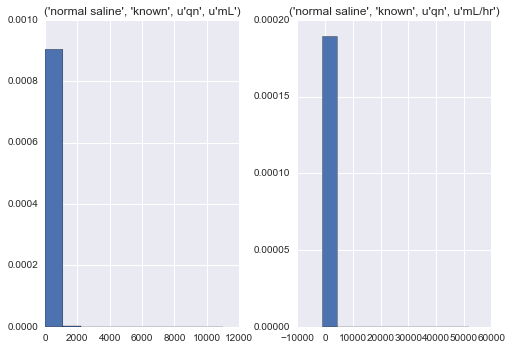

In [42]:
import seaborn as sns
df_cln2.hist(normed=True)

## Single pipeline

In [3]:
all_pipeline = Pipeline([
        ('transform',mimic_transform),
        ('format',standard_pipeline),
        ('clean',cleaning_pipeline)
    ])

In [4]:
label = 'lactate'
df = utils.open_df(hdf5_fname,'extract/{}'.format(label))
df.describe(include='all')

,id,datetime,value,units,itemid
count,382993.000000,393608,393608,393608,393608.000000
unique,NaN,187323,616,2,NaN
top,NaN,2140-07-14 03:59:00,1.2,mmol/L,NaN
freq,NaN,8,20704,393592,NaN
first,NaN,2096-08-25 16:32:00,NaN,NaN,NaN
last,NaN,2210-08-19 04:56:00,NaN,NaN,NaN
mean,150112.612539,NaN,NaN,NaN,64364.242439
std,28874.716612,NaN,NaN,NaN,77900.842790
min,100001.000000,NaN,NaN,NaN,818.000000
25%,125190.000000,NaN,NaN,NaN,1531.000000


In [5]:
all_pipeline.set_params(transform__add_level__level_val=label)
all_pipeline.transform(df)

label                      lactate
status                       known
variable_type                   qn
units                       mmol/L
id     datetime                   
100001 2117-09-11 09:32:00     1.9
100003 2150-04-17 19:12:00     1.1
100006 2108-04-08 10:58:00     4.5
100007 2145-03-31 00:44:00     3.1
       2145-04-02 14:10:00     1.9
100009 2162-05-17 13:19:00     1.1
       2162-05-17 17:14:00     1.5
100010 2109-12-10 10:25:00     0.6
       2109-12-10 12:11:00     0.9
       2109-12-10 13:05:00     1.0
       2109-12-10 13:58:00     0.8
100011 2177-08-29 04:44:00     3.8
       2177-08-29 06:55:00     2.3
100012 2177-03-14 07:38:00     2.3
       2177-03-14 11:42:00     2.5
       2177-03-15 08:05:00     2.1
       2177-03-15 14:01:00     2.6
       2177-03-15 21:42:00     1.8
100016 2188-05-24 12:00:00     2.0
100017 2103-03-11 05:10:00     1.1
100018 2176-08-29 15:29:00     1.3
       2176-08-30 09:23:00     0.9
       2176-08-30 10:19:00     1.0
       2176-08-30 11:29:00     0.9
       2176-08-30 12:40:00     1.1
100020 2142-11-30 21:54:00     1.1
       2142-12-03 00:17:00     1.0
100024 2170-09-19 10:25:00     1.4
       2170-09-19 16:33:00     2.6
       2170-09-20 02:04:00     3.2
...                            ...
199976 2182-02-14 11:15:00     0.8
       2182-02-16 03:57:00     0.8
       2182-02-19 03:59:00     0.8
       2182-02-20 03:31:00     0.7
       2182-02-21 04:55:00     0.9
199979 2182-02-06 09:17:00     1.0
       2182-02-06 14:16:00     3.8
199981 2110-09-24 16:34:00     1.1
       2110-09-24 20:09:00     1.0
       2110-09-25 06:10:00     1.0
199987 2175-05-19 16:30:00     2.3
199988 2169-01-24 12:48:00     1.0
       2169-02-07 01:35:00     1.6
       2169-02-07 11:18:00     1.0
       2169-02-07 16:43:00     1.0
       2169-02-07 22:35:00     1.1
       2169-02-10 05:33:00     1.4
199993 2161-11-12 23:14:00     0.9
       2161-11-13 03:46:00     0.9
199994 2188-07-07 21:23:00     1.0
       2188-07-08 03:09:00     0.7
       2188-07-08 04:13:00     0.6
       2188-07-08 06:20:00     0.7
199998 2119-02-20 10:52:00     1.1
       2119-02-20 12:36:00     1.9
       2119-02-20 13:33:00     2.0
       2119-02-20 13:59:00     2.6
       2119-02-20 20:43:00     1.3
199999 2136-04-04 20:55:00     1.9
       2136-04-06 15:29:00     1.8

[177439 rows x 1 columns]

## Loop over everything

In [6]:
import logger

In [12]:
reload(logger)
simple_data = data_dict.get_panel_defintions(12) #12 is "simple data"
labels = simple_data.label.unique().tolist()

df_final = None
for label in labels:
    logger.log(label,new_level=True)
    logger.log('Open Extract')
    df_extract = utils.open_df(hdf5_fname,'extract/{}'.format(label))

    logger.log('Run Pipeline')
    all_pipeline.set_params(transform__add_level__level_val=label)
    df = all_pipeline.transform(df_extract)
    
    logger.log('Analyze...')
    print utils.data_loss(df_extract.set_index('id').value.to_frame(),df)
    display(df.describe())

    logger.log('Joining!')

    if df_final is None: df_final = df
    else: 
        df_final = df_final.join(df,how='outer')
        del df
    logger.end_log_level()

df_final.head(10)

(2017-06-03 07:18:23) heart rate
(2017-06-03 07:18:23)>> Open Extract
(2017-06-03 07:18:26)<< DONE (3.0s)
(2017-06-03 07:18:26)>> Run Pipeline
(2017-06-03 07:21:19)<< DONE (173.0s)
(2017-06-03 07:21:19)>> Analyze...
((7952939, 1), (7922961, 1), 29978L, 171, '0.3015% records')


label,heart rate
status,known
variable_type,qn
units,beats/min
count,7.922961e+06
mean,1.026618e+02
std,3.552932e+03
min,-8.800000e+01
25%,7.700000e+01
50%,9.200000e+01
75%,1.190000e+02


(2017-06-03 07:21:20)<< DONE (1.0s)
(2017-06-03 07:21:20)>> Joining!
(2017-06-03 07:21:20)<< DONE (0.0s)
(2017-06-03 07:21:20) DONE (177.0s)
(2017-06-03 07:21:20) blood pressure systolic
(2017-06-03 07:21:20)>> Open Extract
(2017-06-03 07:21:23)<< DONE (3.0s)
(2017-06-03 07:21:23)>> Run Pipeline
(2017-06-03 07:25:39)<< DONE (256.0s)
(2017-06-03 07:25:39)>> Analyze...
((6374824, 1), (5974186, 1), 548979L, 174, '0.307% records')


label,blood pressure systolic
status,known
variable_type,qn
units,mmHg
count,5.825845e+06
mean,1.214682e+02
std,1.311542e+02
min,-6.900000e+01
25%,1.040000e+02
50%,1.190000e+02
75%,1.370000e+02


(2017-06-03 07:25:40)<< DONE (1.0s)
(2017-06-03 07:25:40)>> Joining!
(2017-06-03 07:26:28)<< DONE (48.0s)
(2017-06-03 07:26:28) DONE (308.0s)
(2017-06-03 07:26:28) blood pressure diastolic
(2017-06-03 07:26:28)>> Open Extract
(2017-06-03 07:26:31)<< DONE (3.0s)
(2017-06-03 07:26:31)>> Run Pipeline
(2017-06-03 07:30:32)<< DONE (241.0s)
(2017-06-03 07:30:32)>> Analyze...
((6371249, 1), (5976313, 1), 543269L, 170, '0.2999% records')


label,blood pressure diastolic
status,known
variable_type,qn
units,mmHg
count,5.827980e+06
mean,6.115824e+01
std,2.350768e+02
min,-1.600000e+01
25%,5.000000e+01
50%,5.900000e+01
75%,6.900000e+01


(2017-06-03 07:30:34)<< DONE (2.0s)
(2017-06-03 07:30:34)>> Joining!
(2017-06-03 07:31:25)<< DONE (51.0s)
(2017-06-03 07:31:25) DONE (297.0s)
(2017-06-03 07:31:25) blood pressure mean
(2017-06-03 07:31:25)>> Open Extract
(2017-06-03 07:31:26)<< DONE (1.0s)
(2017-06-03 07:31:26)>> Run Pipeline
(2017-06-03 07:32:39)<< DONE (73.0s)
(2017-06-03 07:32:39)>> Analyze...
((2536271, 1), (2415995, 1), 120276L, 0, '0.0% records')


label,blood pressure mean
status,known
variable_type,qn
units,mmHg
count,2.415995e+06
mean,7.879668e+01
std,1.413279e+02
min,-1.350000e+02
25%,6.700000e+01
50%,7.700000e+01
75%,8.800000e+01


(2017-06-03 07:32:40)<< DONE (1.0s)
(2017-06-03 07:32:40)>> Joining!
(2017-06-03 07:33:20)<< DONE (40.0s)
(2017-06-03 07:33:20) DONE (115.0s)
(2017-06-03 07:33:20) respiratory rate
(2017-06-03 07:33:20)>> Open Extract
(2017-06-03 07:33:24)<< DONE (4.0s)
(2017-06-03 07:33:24)>> Run Pipeline
(2017-06-03 07:37:33)<< DONE (249.0s)
(2017-06-03 07:37:33)>> Analyze...
((7810019, 1), (7780015, 1), 5072936L, 172, '0.3035% records')


label,respiratory rate
status,known
variable_type,qn
units,insp/min
count,2.737083e+06
mean,2.092347e+01
std,1.423811e+03
min,0.000000e+00
25%,1.600000e+01
50%,2.000000e+01
75%,2.400000e+01


(2017-06-03 07:37:35)<< DONE (2.0s)
(2017-06-03 07:37:35)>> Joining!
(2017-06-03 07:38:29)<< DONE (54.0s)
(2017-06-03 07:38:29) DONE (309.0s)
(2017-06-03 07:38:29) temperature body
(2017-06-03 07:38:29)>> Open Extract
(2017-06-03 07:38:31)<< DONE (2.0s)
(2017-06-03 07:38:31)>> Run Pipeline
(2017-06-03 07:39:35)<< DONE (64.0s)
(2017-06-03 07:39:35)>> Analyze...
((1751447, 1), (1731794, 1), 461152L, 156, '0.3189% records')


label,temperature body
status,known
variable_type,qn
units,degF
count,1.290295e+06
mean,9.850479e+01
std,9.563484e+00
min,-9.990000e+01
25%,9.760000e+01
50%,9.850000e+01
75%,9.950000e+01


(2017-06-03 07:39:36)<< DONE (1.0s)
(2017-06-03 07:39:36)>> Joining!
(2017-06-03 07:40:14)<< DONE (38.0s)
(2017-06-03 07:40:14) DONE (105.0s)
(2017-06-03 07:40:14) oxygen saturation pulse oximetry
(2017-06-03 07:40:14)>> Open Extract
(2017-06-03 07:40:17)<< DONE (3.0s)
(2017-06-03 07:40:17)>> Run Pipeline
(2017-06-03 07:42:42)<< DONE (145.0s)
(2017-06-03 07:42:42)>> Analyze...
((6099827, 1), (6073019, 1), 26808L, 163, '0.3326% records')


label,oxygen saturation pulse oximetry
status,known
variable_type,qn
units,percent
count,6.073019e+06
mean,9.885942e+01
std,2.942035e+03
min,0.000000e+00
25%,9.600000e+01
50%,9.800000e+01
75%,9.900000e+01


(2017-06-03 07:42:43)<< DONE (1.0s)
(2017-06-03 07:42:43)>> Joining!
(2017-06-03 07:43:35)<< DONE (52.0s)
(2017-06-03 07:43:35) DONE (201.0s)
(2017-06-03 07:43:35) weight body
(2017-06-03 07:43:35)>> Open Extract
(2017-06-03 07:43:36)<< DONE (1.0s)
(2017-06-03 07:43:36)>> Run Pipeline
(2017-06-03 07:43:40)<< DONE (4.0s)
(2017-06-03 07:43:40)>> Analyze...
((95425, 1), (94457, 1), 1956L, 158, '0.4958% records')


label,weight body
status,known
variable_type,qn
units,kg
count,9.346900e+04
mean,2.676828e+02
std,3.908673e+04
min,0.000000e+00
25%,6.980000e+01
50%,8.340000e+01
75%,9.890000e+01


(2017-06-03 07:43:40)<< DONE (0.0s)
(2017-06-03 07:43:40)>> Joining!
(2017-06-03 07:44:15)<< DONE (35.0s)
(2017-06-03 07:44:15) DONE (40.0s)
(2017-06-03 07:44:15) output urine
(2017-06-03 07:44:15)>> Open Extract
(2017-06-03 07:44:16)<< DONE (1.0s)
(2017-06-03 07:44:16)>> Run Pipeline
(2017-06-03 07:47:57)<< DONE (221.0s)
(2017-06-03 07:47:57)>> Analyze...
((3644639, 1), (3624029, 1), 417242L, 92, '0.1758% records')


label,output urine
status,known
variable_type,qn
units,mL
count,3.216363e+06
mean,1.265574e+02
std,2.577291e+03
min,-1.500000e+03
25%,4.200000e+01
50%,8.000000e+01
75%,1.600000e+02


(2017-06-03 07:47:58)<< DONE (1.0s)
(2017-06-03 07:47:58)>> Joining!
(2017-06-03 07:48:43)<< DONE (45.0s)
(2017-06-03 07:48:43) DONE (268.0s)
(2017-06-03 07:48:43) glasgow coma scale motor
(2017-06-03 07:48:43)>> Open Extract
(2017-06-03 07:48:43)<< DONE (0.0s)
(2017-06-03 07:48:43)>> Run Pipeline
(2017-06-03 07:49:29)<< DONE (46.0s)
(2017-06-03 07:49:29)>> Analyze...
((952565, 1), (949198, 1), 3367L, 1, '0.0037% records')


label,glasgow coma scale motor
status,known
variable_type,ord
units,no_units
count,949198
unique,6
top,Obeys commands
freq,642879


(2017-06-03 07:49:29)<< DONE (0.0s)
(2017-06-03 07:49:29)>> Joining!
(2017-06-03 07:50:06)<< DONE (37.0s)
(2017-06-03 07:50:06) DONE (83.0s)
(2017-06-03 07:50:06) glasgow coma scale eye opening
(2017-06-03 07:50:06)>> Open Extract
(2017-06-03 07:50:07)<< DONE (1.0s)
(2017-06-03 07:50:07)>> Run Pipeline
(2017-06-03 07:50:50)<< DONE (43.0s)
(2017-06-03 07:50:50)>> Analyze...
((956672, 1), (953595, 1), 3077L, 1, '0.0037% records')


label,glasgow coma scale eye opening
status,known
variable_type,ord
units,no_units
count,953595
unique,4
top,Eyes open spontaneously
freq,588057


(2017-06-03 07:50:50)<< DONE (0.0s)
(2017-06-03 07:50:50)>> Joining!
(2017-06-03 07:51:28)<< DONE (38.0s)
(2017-06-03 07:51:28) DONE (82.0s)
(2017-06-03 07:51:28) glasgow coma scale verbal
(2017-06-03 07:51:28)>> Open Extract
(2017-06-03 07:51:29)<< DONE (1.0s)
(2017-06-03 07:51:29)>> Run Pipeline
(2017-06-03 07:52:14)<< DONE (45.0s)
(2017-06-03 07:52:14)>> Analyze...
((954700, 1), (950913, 1), 3787L, 2, '0.0074% records')


label,glasgow coma scale verbal
status,known
variable_type,ord
units,no_units
count,950913
unique,5
top,No verbal response (>2 yrs); no vocal response...
freq,465193


(2017-06-03 07:52:14)<< DONE (0.0s)
(2017-06-03 07:52:14)>> Joining!
(2017-06-03 07:52:51)<< DONE (37.0s)
(2017-06-03 07:52:51) DONE (83.0s)
(2017-06-03 07:52:51) normal saline
(2017-06-03 07:52:51)>> Open Extract
(2017-06-03 07:52:51)<< DONE (0.0s)
(2017-06-03 07:52:51)>> Run Pipeline
(2017-06-03 08:01:38)<< DONE (527.0s)
(2017-06-03 08:01:38)>> Analyze...
((817373, 1), (504874, 2), 265615L, 8, '0.0405% records')


label         normal saline               
status                known               
variable_type            qn               
units                    mL          mL/hr
count          49173.000000  456484.000000
mean             389.563178      75.626948
std              380.287765     217.512467
min                0.000000    -906.000000
25%              100.000000       6.000000
50%              250.000000      15.000000
75%              500.000000      62.204886
max            11000.000000   51947.999400

(2017-06-03 08:01:38)<< DONE (0.0s)
(2017-06-03 08:01:38)>> Joining!
(2017-06-03 08:02:15)<< DONE (37.0s)
(2017-06-03 08:02:15) DONE (564.0s)
(2017-06-03 08:02:15) lactated ringers
(2017-06-03 08:02:15)>> Open Extract
(2017-06-03 08:02:15)<< DONE (0.0s)
(2017-06-03 08:02:15)>> Run Pipeline
(2017-06-03 08:02:57)<< DONE (42.0s)
(2017-06-03 08:02:57)>> Analyze...
((504306, 1), (254175, 2), 19193L, 18, '0.1085% records')


label         lactated ringers             
status                   known             
variable_type               qn             
units                       mL        mL/hr
count            248510.000000  2161.000000
mean                204.109607   289.877760
std                 338.277593   418.153805
min                   0.000000     0.000000
25%                  15.000000     0.000000
50%                 100.000000    99.994818
75%                 200.000000   499.999980
max               60000.000000  3923.333176

(2017-06-03 08:02:57)<< DONE (0.0s)
(2017-06-03 08:02:57)>> Joining!
(2017-06-03 08:03:34)<< DONE (37.0s)
(2017-06-03 08:03:34) DONE (79.0s)
(2017-06-03 08:03:34) norepinephrine
(2017-06-03 08:03:34)>> Open Extract
(2017-06-03 08:03:34)<< DONE (0.0s)
(2017-06-03 08:03:34)>> Run Pipeline
(2017-06-03 08:05:19)<< DONE (105.0s)
(2017-06-03 08:05:19)>> Analyze...
((1136938, 1), (389986, 2), 331666L, 17, '0.231% records')


label         norepinephrine              
status                 known              
variable_type             qn              
units             mcg/kg/min       mcg/min
count          286781.000000  14226.000000
mean                0.141207      9.687762
std                 0.343212     14.889317
min                 0.000000      0.000000
25%                 0.035000      2.666667
50%                 0.080000      6.000000
75%                 0.180000     12.000000
max                50.000000    250.000000

(2017-06-03 08:05:20)<< DONE (1.0s)
(2017-06-03 08:05:20)>> Joining!
(2017-06-03 08:05:58)<< DONE (38.0s)
(2017-06-03 08:05:58) DONE (144.0s)
(2017-06-03 08:05:58) vasopressin
(2017-06-03 08:05:58)>> Open Extract
(2017-06-03 08:05:58)<< DONE (0.0s)
(2017-06-03 08:05:58)>> Run Pipeline
(2017-06-03 08:06:20)<< DONE (22.0s)
(2017-06-03 08:06:20)>> Analyze...
((339184, 1), (110333, 2), 16608L, 8, '0.3406% records')


label           vasopressin              
status                known              
variable_type            qn              
units                 units     units/min
count          57371.000000  98872.000000
mean               2.517366      0.992521
std                4.842854      1.291858
min                0.000000      0.000000
25%                1.800000      0.040000
50%                2.400000      0.044000
75%                2.400000      2.400000
max              722.400000     50.000000

(2017-06-03 08:06:20)<< DONE (0.0s)
(2017-06-03 08:06:20)>> Joining!
(2017-06-03 08:06:56)<< DONE (36.0s)
(2017-06-03 08:06:56) DONE (58.0s)
(2017-06-03 08:06:56) hemoglobin
(2017-06-03 08:06:56)>> Open Extract
(2017-06-03 08:06:56)<< DONE (0.0s)
(2017-06-03 08:06:56)>> Run Pipeline
(2017-06-03 08:07:52)<< DONE (56.0s)
(2017-06-03 08:07:52)>> Analyze...
((1167921, 1), (671087, 1), 641393L, 7, '0.0123% records')


label,hemoglobin
status,known
variable_type,qn
units,g/dL
count,526528.000000
mean,10.351784
std,1.980592
min,0.000000
25%,9.000000
50%,10.100000
75%,11.400000


(2017-06-03 08:07:52)<< DONE (0.0s)
(2017-06-03 08:07:52)>> Joining!
(2017-06-03 08:08:36)<< DONE (44.0s)
(2017-06-03 08:08:36) DONE (100.0s)
(2017-06-03 08:08:36) lactate
(2017-06-03 08:08:36)>> Open Extract
(2017-06-03 08:08:37)<< DONE (1.0s)
(2017-06-03 08:08:37)>> Run Pipeline
(2017-06-03 08:08:52)<< DONE (15.0s)
(2017-06-03 08:08:52)>> Analyze...
((393608, 1), (177439, 1), 216244L, 33, '0.0962% records')


label,lactate
status,known
variable_type,qn
units,mmol/L
count,177364.000000
mean,8.286749
std,2374.466306
min,0.000000
25%,1.200000
50%,1.800000
75%,2.900000


(2017-06-03 08:08:52)<< DONE (0.0s)
(2017-06-03 08:08:52)>> Joining!
(2017-06-03 08:09:35)<< DONE (43.0s)


label                      heart rate blood pressure systolic  \
status                          known                   known   
variable_type                      qn                      qn   
units                       beats/min                    mmHg   
id     datetime                                                 
100001 2117-09-11 09:22:00        NaN                     NaN   
       2117-09-11 09:32:00        NaN                     NaN   
       2117-09-11 12:50:00        NaN                     NaN   
       2117-09-11 12:55:00        NaN                     NaN   
       2117-09-11 12:57:00      122.0                     NaN   
       2117-09-11 13:00:00      118.0                     NaN   
       2117-09-11 13:01:00        NaN                   192.0   
       2117-09-11 13:48:00        NaN                     NaN   
       2117-09-11 13:49:00        NaN                     NaN   
       2117-09-11 13:50:00      118.0                     NaN   

label                      blood pressure diastolic blood pressure mean  \
status                                        known               known   
variable_type                                    qn                  qn   
units                                          mmHg                mmHg   
id     datetime                                                           
100001 2117-09-11 09:22:00                      NaN                 NaN   
       2117-09-11 09:32:00                      NaN                 NaN   
       2117-09-11 12:50:00                      NaN                 NaN   
       2117-09-11 12:55:00                      NaN                 NaN   
       2117-09-11 12:57:00                      NaN                 NaN   
       2117-09-11 13:00:00                      NaN                 NaN   
       2117-09-11 13:01:00                    100.0               122.0   
       2117-09-11 13:48:00                      NaN                 NaN   
       2117-09-11 13:49:00                      NaN                 NaN   
       2117-09-11 13:50:00                      NaN                 NaN   

label                      respiratory rate temperature body  \
status                                known            known   
variable_type                            qn               qn   
units                              insp/min             degF   
id     datetime                                                
100001 2117-09-11 09:22:00              NaN              NaN   
       2117-09-11 09:32:00              NaN              NaN   
       2117-09-11 12:50:00              NaN              NaN   
       2117-09-11 12:55:00              NaN              NaN   
       2117-09-11 12:57:00             14.0              NaN   
       2117-09-11 13:00:00             22.0              NaN   
       2117-09-11 13:01:00              NaN              NaN   
       2117-09-11 13:48:00              NaN             98.0   
       2117-09-11 13:49:00              NaN              NaN   
       2117-09-11 13:50:00             22.0              NaN   

label                      oxygen saturation pulse oximetry weight body  \
status                                                known       known   
variable_type                                            qn          qn   
units                                               percent          kg   
id     datetime                                                           
100001 2117-09-11 09:22:00                              NaN         NaN   
       2117-09-11 09:32:00                              NaN         NaN   
       2117-09-11 12:50:00                              NaN         NaN   
       2117-09-11 12:55:00                              NaN         NaN   
       2117-09-11 12:57:00                              NaN         NaN   
       2117-09-11 13:00:00                              NaN         NaN   
       2117-09-11 13:01:00                              NaN         NaN   
       2117-09-11 13:48:00           

In [15]:
utils.save_df(df_final,hdf5_fname,'cleaned/test1')

label                      heart rate blood pressure systolic  \
status                          known                   known   
variable_type                      qn                      qn   
units                       beats/min                    mmHg   
id     datetime                                                 
100001 2117-09-11 09:22:00        NaN                     NaN   
       2117-09-11 09:32:00        NaN                     NaN   
       2117-09-11 12:50:00        NaN                     NaN   
       2117-09-11 12:55:00        NaN                     NaN   
       2117-09-11 12:57:00      122.0                     NaN   
       2117-09-11 13:00:00      118.0                     NaN   
       2117-09-11 13:01:00        NaN                   192.0   
       2117-09-11 13:48:00        NaN                     NaN   
       2117-09-11 13:49:00        NaN                     NaN   
       2117-09-11 13:50:00      118.0                     NaN   
       2117-09-11 14:00:00      118.0                   165.0   
       2117-09-11 15:00:00      110.0                   119.0   
       2117-09-11 15:48:00        NaN                     NaN   
       2117-09-11 15:59:00        NaN                     NaN   
       2117-09-11 16:00:00      104.0                   169.0   
       2117-09-11 16:02:00        NaN                     NaN   
       2117-09-11 16:11:00        NaN                     NaN   
       2117-09-11 16:12:00        NaN                     NaN   
       2117-09-11 17:00:00      101.0                   110.0   
       2117-09-11 18:00:00      112.0                   170.0   
       2117-09-11 18:34:00        NaN                     NaN   
       2117-09-11 19:00:00      108.0                   179.0   
       2117-09-11 19:31:00        NaN                     NaN   
       2117-09-11 20:00:00      116.0                   183.0   
       2117-09-11 21:00:00      117.0                   189.0   
       2117-09-11 21:12:00        NaN                     NaN   
       2117-09-11 21:16:00        NaN                     NaN   
       2117-09-11 22:00:00      124.0                   180.0   
       2117-09-11 22:10:00        NaN                     NaN   
       2117-09-11 22:25:00        NaN                     NaN   
...                               ...                     ...   
199999 2136-04-09 09:00:00       79.0                   130.0   
       2136-04-09 10:00:00       81.0                   123.0   
       2136-04-09 11:00:00       89.0                   115.0   
       2136-04-09 12:00:00       72.0                   119.0   
       2136-04-09 13:00:00       82.0                   156.0   
       2136-04-09 14:00:00       74.0                   128.0   
       2136-04-09 15:00:00       69.0                   129.0   
       2136-04-09 16:00:00       71.0                   133.0   
       2136-04-09 17:00:00       68.0                   150.0   
       2136-04-09 18:00:00       90.0                   146.0   
       2136-04-09 19:00:00       78.0                   134.0   
       2136-04-09 20:00:00       82.0                   142.0   
       2136-04-09 21:00:00       81.0                   132.0   
       2136-04-09 22:00:00       72.0                   112.0   
       2136-04-09 23:00:00       65.0                   129.0   
       2136-04-10 00:00:00       80.0                     NaN   
       2136-04-10 00:01:00        NaN                   128.0   
       2136-04-10 01:00:00       80.0                   124.0   
       2136-04-10 02:00:00       76.0                   130.0   
       2136-04-10 02:28:00        NaN                     NaN   
       2136-04-10 03:00:00       72.0                   126.0   
       2136-04-10 04:00:00       66.0                   126.0   
       2136-04-10 05:00:00       66.0                   129.0   
       2136-04-10 06:00:00       65.0                   143.0   
       2136-04-10 07:00:00       79.0                     NaN   
       2136-04-10 08:00:00       69

# Prepare for ML


1. All categories to numeric representations
2. Segment, add to index
3. Transform into features (FeatureUnion)

In [16]:
intro_pipeline = Pipeline([
        ('transform',mimic_transform),
        ('format',standard_pipeline),
    ])

In [17]:
label = 'lactate'
df_extract = utils.open_df(hdf5_fname,'extract/{}'.format(label))
df_cleaned = intro_pipeline.transform(df_extract)
df_cleaned.head()

label                      lactate                                          \
status                       known                   unknown                 
variable_type                   qn                        qn           nom   
units                       mmol/L                  no_units      no_units   
description                  50813 225668  818 1531   225668 50813(mmol/L)   
id     datetime                                                              
100001 2117-09-11 09:32:00     1.9    NaN  NaN  NaN      NaN           NaN   
100003 2150-04-17 19:12:00     1.1    1.1  NaN  NaN      NaN           NaN   
100006 2108-04-08 10:58:00     4.5    NaN  4.5  NaN      NaN           NaN   
100007 2145-03-31 00:44:00     3.1    NaN  NaN  NaN      NaN           NaN   
       2145-04-02 14:10:00     1.9    NaN  NaN  NaN      NaN           NaN   

label                                                
status                                               
variable_type                                        
units                                                
description                818(mmol/L) 1531(mmol/L)  
id     datetime                                      
100001 2117-09-11 09:32:00         NaN          NaN  
100003 2150-04-17 19:12:00         NaN          NaN  
100006 2108-04-08 10:58:00         NaN          NaN  
100007 2145-03-31 00:44:00         NaN          NaN  
       2145-04-02 14:10:00         NaN          NaN

In [18]:
df_cleaned.describe(include='all')

label                lactate                                             \
status                 known                                              
variable_type             qn                                              
units                 mmol/L                                              
description            50813         225668           818          1531   
count          176767.000000   69402.000000  72916.000000  63134.000000   
unique                   NaN            NaN           NaN           NaN   
top                      NaN            NaN           NaN           NaN   
freq                     NaN            NaN           NaN           NaN   
mean                2.635120      16.943607      2.849300      2.780338   
std                 2.590268    3795.881233      3.152031      3.045527   
min                 0.000000       0.050000      0.000000      0.000000   
25%                 1.200000       1.200000      1.200000      1.200000   
50%                 1.800000       1.800000      1.800000      1.800000   
75%                 2.900000       2.900000      3.100000      3.000000   
max                36.000000  999999.000000    153.000000    153.000000   

label                                                             
status            unknown                                         
variable_type          qn           nom                           
units            no_units      no_units                           
description        225668 50813(mmol/L) 818(mmol/L) 1531(mmol/L)  
count           14.000000            57          57           23  
unique                NaN            34          14            8  
top                   NaN         ERROR     no data      no data  
freq                  NaN            18          37            9  
mean            52.835714           NaN         NaN          NaN  
std             82.567153           NaN         NaN          NaN  
min              0.000000           NaN         NaN          NaN  
25%              1.175000           NaN         NaN          NaN  
50%              3.400000           NaN         NaN          NaN  
75%            115.400000           NaN         NaN          NaN  
max            203.000000           NaN         NaN          NaN

In [28]:
nominal_cols = df_cleaned.columns.get_level_values('variable_type') == variable_type.NOMINAL

for col_name in df_cleaned.loc[:,nominal_cols]:
    column = df_cleaned[col_nam]
    df_dummies = pd.get_dummies(column)
    dummy_col_names = [col_name[:-1] + ('{}_{}'.format(col_name[-1],text),) for text in df_dummies.columns]
    df_dummies.columns = pd.MultiIndex.from_tuples(dummy_col_names,names=df_cleaned.columns.names)
    
    df_cleaned.drop(col_name,axis=1,inplace=True)
    df_cleaned = df_cleaned.join(df_dummies,how='outer')

df_cleaned

label                      lactate                                            \
status                       known                   unknown                   
variable_type                   qn                        qn             nom   
units                       mmol/L                  no_units        no_units   
description                  50813 225668  818 1531   225668 50813(mmol/L)_.   
id     datetime                                                                
100001 2117-09-11 09:32:00     1.9    NaN  NaN  NaN      NaN               0   
100003 2150-04-17 19:12:00     1.1    1.1  NaN  NaN      NaN               0   
100006 2108-04-08 10:58:00     4.5    NaN  4.5  NaN      NaN               0   
100007 2145-03-31 00:44:00     3.1    NaN  NaN  NaN      NaN               0   
       2145-04-02 14:10:00     1.9    NaN  NaN  NaN      NaN               0   
100009 2162-05-17 13:19:00     1.1    1.1  NaN  NaN      NaN               0   
       2162-05-17 17:14:00     1.5    1.5  NaN  NaN      NaN               0   
100010 2109-12-10 10:25:00     0.6    NaN  NaN  NaN      NaN               0   
       2109-12-10 12:11:00     0.9    NaN  NaN  NaN      NaN               0   
       2109-12-10 13:05:00     1.0    NaN  NaN  NaN      NaN               0   
       2109-12-10 13:58:00     0.8    NaN  NaN  NaN      NaN               0   
100011 2177-08-29 04:44:00     3.8    NaN  NaN  NaN      NaN               0   
       2177-08-29 06:55:00     2.3    2.3  NaN  NaN      NaN               0   
100012 2177-03-14 07:38:00     2.3    NaN  NaN  NaN      NaN               0   
       2177-03-14 11:42:00     2.5    2.5  NaN  NaN      NaN               0   
       2177-03-15 08:05:00     2.1    2.1  NaN  NaN      NaN               0   
       2177-03-15 14:01:00     2.6    2.6  NaN  NaN      NaN               0   
       2177-03-15 21:42:00     1.8    1.8  NaN  NaN      NaN               0   
100016 2188-05-24 12:00:00     2.0    NaN  NaN  NaN      NaN               0   
100017 2103-03-11 05:10:00     1.1    NaN  1.1  NaN      NaN               0   
100018 2176-08-29 15:29:00     1.3    NaN  NaN  NaN      NaN               0   
       2176-08-30 09:23:00     0.9    0.9  NaN  NaN      NaN               0   
       2176-08-30 10:19:00     1.0    1.0  NaN  NaN      NaN               0   
       2176-08-30 11:29:00     0.9    0.9  NaN  NaN      NaN               0   
       2176-08-30 12:40:00     1.1    1.1  NaN  NaN      NaN               0   
100020 2142-11-30 21:54:00     1.1    NaN  NaN  NaN      NaN               0   
       2142-12-03 00:17:00     1.0    NaN  NaN  NaN      NaN               0   
100024 2170-09-19 10:25:00     1.4    1.4  NaN  NaN      NaN               0   
       2170-09-19 16:33:00     2.6    2.6  NaN  NaN      NaN               0   
       2170-09-20 02:04:00     3.2    3.2  NaN  NaN      NaN               0   
...                            ...    ...  ...  ...      ...             ...   
199976 2182-02-14 11:15:00     0.8    NaN  0.8  NaN      NaN               0   
       2182-02-16 03:57:00     0.8    NaN  0.8  NaN      NaN               0   
       2182-02-19 03:59:00     0.8    NaN  0.8  NaN      NaN               0   
       2182-02-20 03:31:00     0.7    NaN  0.7  NaN      NaN               0   
       2182-02-21 04:55:00     0.9    NaN  0.9  NaN      NaN               0   
199979 2182-02-06 09:17:00     1.0    NaN  NaN  NaN      NaN               0   
       2182-02-06 14:16:00     3.8    3.8  NaN  NaN      NaN               0   
199981 2110-09-24 16:34:00     1.1    NaN  1.1  1.1      NaN               0   
       2110-09-24 20:09:00     1.0    NaN  1.0  1.0      NaN               0   
       2110-09-25 06:10:00     1.0    NaN  1.0  1.0      NaN               0   
199987 2175-05-19 16:30:00     2.3    NaN  NaN  NaN      NaN               0   
199988 2169-01-24 12:48:00     1.0    NaN  NaN  NaN      NaN               0   
       2169-02-07 01:35:00     1.6    NaN  1.6  NaN      NaN               0   


## Possible additional cleaning:

1. Infer UOM 
2. Remove extreme values [DONE]

In [2]:
import utils
import mimic
import transformers
from sklearn.pipeline import Pipeline
import icu_data_defs
import units

In [3]:
df_temp = utils.open_df('data/mimic_data','extract/temperature body')

In [4]:
reload(mimic)
pipeline = mimic.transform_pipeline('temperature body')

In [5]:
df_temp.head(20)

,id,datetime,value,units,itemid
0,185910.0,2166-08-25 00:00:00,98.400001525878906,degF,678
1,188670.0,2183-08-23 20:00:00,99.300003051757812,degF,678
2,185910.0,2166-08-12 08:00:00,98.699996948242188,degF,678
3,185910.0,2166-08-13 17:00:00,99.900001525878906,degF,678
4,166707.0,2122-02-11 20:00:00,37.900001525878906,degC,676
5,166707.0,2122-02-13 00:00:00,97.800003051757812,degF,678
6,185910.0,2166-08-11 21:00:00,99.099998474121094,degF,678
7,185910.0,2166-08-24 04:00:00,98.900001525878906,degF,678
8,176176.0,2116-12-24 16:00:00,99.099998474121094,degF,678
9,185910.0,2166-08-13 03:00:00,99.199996948242188,degF,678


In [6]:
df_temp_tr = pipeline.transform(df_temp)

In [7]:
df_temp_tr.head(20)

label                      temperature body                     
units                                  degF          degC       
description                          223761 678    223762 676   
id     datetime                                                 
100001 2117-09-11 13:48:00               98   None   None   None
       2117-09-11 16:00:00             97.9   None   None   None
       2117-09-11 19:00:00             99.5   None   None   None
       2117-09-11 22:00:00              100   None   None   None
       2117-09-12 01:00:00             99.9   None   None   None
       2117-09-12 04:00:00             97.7   None   None   None
       2117-09-12 08:00:00             97.8   None   None   None
       2117-09-12 12:00:00             97.5   None   None   None
       2117-09-12 19:00:00             99.8   None   None   None
       2117-09-13 00:00:00             99.7   None   None   None
       2117-09-13 04:00:00             99.3   None   None   None
       2117-09-13 08:00:00             99.4   None   None   None
       2117-09-13 12:00:00             98.8   None   None   None
       2117-09-13 16:00:00             99.3   None   None   None
       2117-09-13 22:00:00             99.9   None   None   None
       2117-09-14 00:00:00             99.4   None   None   None
       2117-09-14 04:00:00             99.6   None   None   None
       2117-09-14 08:00:00               99   None   None   None
       2117-09-14 13:00:00               98   None   None   None
       2117-09-14 19:00:00             99.5   None   None   None

In [26]:
reload(transformers)
reload(units)
reload(icu_data_defs)
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
agg_func = lambda x:x.iloc[0]
ureg = units.MedicalUreg()
standard_pipeline = Pipeline([
        ('drop_small_columns',transformers.remove_small_columns(threshold=5)),
        ('aggregate_same_datetime',transformers.same_index_aggregator(agg_func)),
        ('split_dtype',transformers.split_dtype())
    ])

stnd_cols = transformers.column_standardizer(data_dict,ureg)
drop_oob = transformers.oob_value_remover(data_dict)

In [9]:
df_temp_cl = standard_pipeline.transform(df_temp_tr)

In [10]:
df_temp_cl.head(20)

label                      temperature body                     
units                                  degF          degC       
description                          223761 678    223762 676   
id     datetime                                                 
100001 2117-09-11 13:48:00             98.0    NaN    NaN    NaN
       2117-09-11 16:00:00             97.9    NaN    NaN    NaN
       2117-09-11 19:00:00             99.5    NaN    NaN    NaN
       2117-09-11 22:00:00            100.0    NaN    NaN    NaN
       2117-09-12 01:00:00             99.9    NaN    NaN    NaN
       2117-09-12 04:00:00             97.7    NaN    NaN    NaN
       2117-09-12 08:00:00             97.8    NaN    NaN    NaN
       2117-09-12 12:00:00             97.5    NaN    NaN    NaN
       2117-09-12 19:00:00             99.8    NaN    NaN    NaN
       2117-09-13 00:00:00             99.7    NaN    NaN    NaN
       2117-09-13 04:00:00             99.3    NaN    NaN    NaN
       2117-09-13 08:00:00             99.4    NaN    NaN    NaN
       2117-09-13 12:00:00             98.8    NaN    NaN    NaN
       2117-09-13 16:00:00             99.3    NaN    NaN    NaN
       2117-09-13 22:00:00             99.9    NaN    NaN    NaN
       2117-09-14 00:00:00             99.4    NaN    NaN    NaN
       2117-09-14 04:00:00             99.6    NaN    NaN    NaN
       2117-09-14 08:00:00             99.0    NaN    NaN    NaN
       2117-09-14 13:00:00             98.0    NaN    NaN    NaN
       2117-09-14 19:00:00             99.5    NaN    NaN    NaN

In [11]:
df_temp_conv = stnd_cols.transform(df_temp_cl)

In [12]:
df_temp_conv.describe()

label         temperature body                                            
status                   known                                            
variable_type               qn                                            
units                     degF                                            
description             223761            678  223762(degC)      676(degC)
count            522143.000000  768158.000000  74144.000000  370309.000000
mean                 98.407970      98.570606     99.193821      98.765740
std                  14.681127       2.666614      9.735224       2.608901
min                 -99.900000       0.000000     26.600000      32.000000
25%                  97.500000      97.599998     97.520000      97.879998
50%                  98.300000      98.599998     98.600000      98.960002
75%                  99.300000      99.599998     99.680000      99.860002
max                9637.000000     109.000000    709.700000     115.700000

In [13]:
df_temp_no_oob = drop_oob.transform(df_temp_conv)

In [14]:
df_temp_no_oob.describe()

label         temperature body                                            
status                   known                                            
variable_type               qn                                            
units                     degF                                            
description             223761            678  223762(degC)      676(degC)
count            522116.000000  768158.000000  73638.000000  370309.000000
mean                 98.352642      98.570606     98.430646      98.765740
std                   2.825922       2.666614      2.467125       2.608901
min                   0.000000       0.000000     26.600000      32.000000
25%                  97.500000      97.599998     97.340000      97.879998
50%                  98.300000      98.599998     98.600000      98.960002
75%                  99.300000      99.599998     99.680000      99.860002
max                 129.000000     109.000000    113.000000     115.700000

In [27]:
combine_like = transformers.combine_like_cols()
df_temp_combined = combine_like.transform(df_temp_no_oob)

In [28]:
df_temp_combined

label                      temperature body
status                                known
variable_type                            qn
units                                  degF
description                             all
id     datetime                            
100001 2117-09-11 13:48:00        98.000000
       2117-09-11 16:00:00        97.900000
       2117-09-11 19:00:00        99.500000
       2117-09-11 22:00:00       100.000000
       2117-09-12 01:00:00        99.900000
       2117-09-12 04:00:00        97.700000
       2117-09-12 08:00:00        97.800000
       2117-09-12 12:00:00        97.500000
       2117-09-12 19:00:00        99.800000
       2117-09-13 00:00:00        99.700000
       2117-09-13 04:00:00        99.300000
       2117-09-13 08:00:00        99.400000
       2117-09-13 12:00:00        98.800000
       2117-09-13 16:00:00        99.300000
       2117-09-13 22:00:00        99.900000
       2117-09-14 00:00:00        99.400000
       2117-09-14 04:00:00        99.600000
       2117-09-14 08:00:00        99.000000
       2117-09-14 13:00:00        98.000000
       2117-09-14 19:00:00        99.500000
       2117-09-15 00:00:00        99.600000
       2117-09-15 08:00:00        98.300000
       2117-09-15 12:00:00        97.800000
       2117-09-15 16:00:00        98.600000
100003 2150-04-17 20:31:00        95.900000
       2150-04-17 22:00:00        98.200000
       2150-04-18 00:00:00        97.400000
       2150-04-18 04:00:00        98.000000
       2150-04-18 08:00:00        97.400000
       2150-04-18 11:18:00        96.300000
...                                     ...
199998 2119-02-21 02:00:00       100.400000
       2119-02-21 03:00:00       100.220003
       2119-02-21 04:00:00        99.860002
       2119-02-21 05:00:00       100.220003
       2119-02-21 06:00:00       100.400000
       2119-02-21 07:00:00       100.400000
       2119-02-21 08:00:00       100.400000
199999 2136-04-06 16:07:00        97.800000
       2136-04-06 20:00:00        97.500000
       2136-04-07 00:00:00        97.400000
       2136-04-07 02:00:00       101.000000
       2136-04-07 05:00:00       100.500000
       2136-04-07 08:00:00        99.000000
       2136-04-07 12:00:00        99.800000
       2136-04-07 15:00:00       100.700000
       2136-04-07 18:00:00        97.600000
       2136-04-07 22:00:00        98.600000
       2136-04-08 04:00:00        98.500000
       2136-04-08 09:00:00        97.800000
       2136-04-08 16:00:00        97.700000
       2136-04-08 20:00:00        99.000000
       2136-04-09 00:00:00        99.600000
       2136-04-09 05:00:00        99.100000
       2136-04-09 08:00:00        97.800000
       2136-04-09 12:00:00        98.300000
       2136-04-09 16:00:00        98.000000
       2136-04-09 20:00:00        97.400000
       2136-04-10 00:00:00        97.400000
       2136-04-10 03:00:00        97.400000
       2136-04-10 08:00:00        98.100000

[1731503 rows x 1 columns]

# Segmenting

In [29]:
import segmenting

In [30]:
df_context = utils.open_df('data/mimic_data','context')

In [31]:
df_context.head()

,pt_id,id,start_dt,end_dt,lang,religion,marital_status,ethnicity,dx_info,admission_location,...,dod,icd_codes,age,icustay_id,dbsource,first_icu,last_icu,intime,outtime,los
0,87,190659,2191-02-25 20:30:00,2191-04-25 15:18:00,,UNOBTAINABLE,,UNKNOWN/NOT SPECIFIED,NEWBORN,PHYS REFERRAL/NORMAL DELI,...,None,"[V3101, 76515, 76524, 769, 7707, 7775, 7742, 7...",0 days 20:30:00,277633.0,carevue,NICU,NICU,2191-02-25 21:09:05,2191-04-25 15:38:56,58.7707
1,88,123010,2111-08-29 03:03:00,2111-09-03 14:24:00,,,,BLACK/AFRICAN AMERICAN,S/P MOTOR VEHICLE ACCIDENT-STABBING,EMERGENCY ROOM ADMIT,...,None,"[86113, 5119, 4239, E966]",10467 days 03:03:00,297289.0,carevue,TSICU,TSICU,2111-08-29 03:04:42,2111-08-30 21:08:09,1.7524
2,89,188646,2185-06-17 05:22:00,2185-06-21 11:15:00,,UNOBTAINABLE,,UNKNOWN/NOT SPECIFIED,NEWBORN,PHYS REFERRAL/NORMAL DELI,...,None,"[V3101, 7742, 76516, 76527, 22801, V290]",0 days 05:22:00,249786.0,carevue,NICU,NICU,2185-06-17 05:46:00,2185-06-21 12:00:41,4.2602
3,91,121205,2177-04-23 00:08:00,2177-05-10 15:16:00,,JEWISH,MARRIED,WHITE,FEVER,EMERGENCY ROOM ADMIT,...,2177-05-10 00:00:00,"[20008, 2765, 5559, 99812, 51881, 4470, 135, 5...",29794 days 00:08:00,218528.0,carevue,CSRU,CSRU,2177-04-27 02:08:00,2177-04-27 14:03:00,0.4965
4,91,121205,2177-04-23 00:08:00,2177-05-10 15:16:00,,JEWISH,MARRIED,WHITE,FEVER,EMERGENCY ROOM ADMIT,...,2177-05-10 00:00:00,"[20008, 2765, 5559, 99812, 51881, 4470, 135, 5...",29794 days 00:08:00,256972.0,carevue,MICU,MICU,2177-05-07 03:52:00,2177-05-10 15:16:00,3.4750


In [33]:
end_dt = df_temp_combined.iloc[:,0].groupby(level='id').apply(lambda x:x.sample(1))
end_dt = end_dt.reset_index(level=0,drop=True).reset_index(level=1,drop=False).iloc[:,0]

In [34]:
reload(segmenting)
reload(utils)
all_before = segmenting.all_before(end_dt,df_context)
n_hrs_before = segmenting.n_hrs_before(end_dt,10)
periodic = segmenting.periodic(10,df_context)

In [138]:
df_temp_all_before = all_before.transform(df_temp_cl)
df_temp_all_before[df_temp_all_before.index.get_level_values('seg_id') > -1]

C:\Users\genkinjz\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\tools\merge.py:480: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


label                             temperature body                    \
units                                         degF              degC   
description                                 223761     678    223762   
id     datetime            seg_id                                      
100001 2117-09-11 13:48:00 0                  98.0        NaN    NaN   
       2117-09-11 16:00:00 0                  97.9        NaN    NaN   
       2117-09-11 19:00:00 0                  99.5        NaN    NaN   
       2117-09-11 22:00:00 0                 100.0        NaN    NaN   
       2117-09-12 01:00:00 0                  99.9        NaN    NaN   
       2117-09-12 04:00:00 0                  97.7        NaN    NaN   
       2117-09-12 08:00:00 0                  97.8        NaN    NaN   
       2117-09-12 12:00:00 0                  97.5        NaN    NaN   
100003 2150-04-17 20:31:00 0                  95.9        NaN    NaN   
       2150-04-17 22:00:00 0                  98.2        NaN    NaN   
       2150-04-18 00:00:00 0                  97.4        NaN    NaN   
100006 2108-04-06 16:30:00 0                   NaN  97.000000    NaN   
       2108-04-06 20:00:00 0                   NaN  97.400002    NaN   
       2108-04-07 00:00:00 0                   NaN  97.800003    NaN   
       2108-04-07 04:00:00 0                   NaN  97.000000    NaN   
       2108-04-07 08:00:00 0                   NaN  97.099998    NaN   
       2108-04-07 12:00:00 0                   NaN  97.000000    NaN   
       2108-04-07 20:00:00 0                   NaN  98.800003    NaN   
       2108-04-08 00:00:00 0                   NaN  98.599998    NaN   
       2108-04-08 04:00:00 0                   NaN  98.000000    NaN   
       2108-04-08 08:00:00 0                   NaN  97.199997    NaN   
       2108-04-08 12:00:00 0                   NaN  97.000000    NaN   
       2108-04-08 16:00:00 0                   NaN  98.000000    NaN   
       2108-04-08 20:00:00 0                   NaN  98.800003    NaN   
       2108-04-09 00:00:00 0                   NaN  97.199997    NaN   
       2108-04-09 04:00:00 0                   NaN  97.400002    NaN   
       2108-04-09 08:00:00 0                   NaN  97.099998    NaN   
       2108-04-09 12:00:00 0                   NaN  97.300003    NaN   
       2108-04-09 20:00:00 0                   NaN  97.599998    NaN   
       2108-04-10 00:00:00 0                   NaN  97.000000    NaN   
...                                            ...        ...    ...   
199998 2119-02-20 17:15:00 0                   NaN        NaN    NaN   
       2119-02-20 17:30:00 0                   NaN        NaN    NaN   
       2119-02-20 17:45:00 0                   NaN        NaN    NaN   
       2119-02-20 18:00:00 0                   NaN        NaN    NaN   
       2119-02-20 18:30:00 0                   NaN        NaN    NaN   
       2119-02-20 19:00:00 0                   NaN        NaN    NaN   
       2119-02-20 20:00:00 0                   NaN        NaN    NaN   
       2119-02-20 21:00:00 0                   NaN        NaN    NaN   
       2119-02-20 22:00:00 0                   NaN        NaN    NaN   
       2119-02-20 23:00:00 0                   NaN        NaN    NaN   
199999 2136-04-06 16:07:00 0                  97.8        NaN    NaN   
       2136-04-06 20:00:00 0                  97.5        NaN    NaN   
       2136-04-07 00:00:00 0                  97.4        NaN    NaN   
       2136-04-07 02:00:00 0                 101.0        NaN    NaN   
       2136-04-07 05:00:00 0                 100.5        NaN    NaN   
       2136-04-07 08:00:00 0                  99.0        NaN    NaN   
       2136-04-07 12:00:00 0                  99.8        NaN    NaN   
       2136-04-07 15:00:00 0                 100.7        NaN    NaN   
       2136-04-07 18:00:00 0                  97.6        NaN    NaN   
       2136-04-07 22:00:00 0                  98.6        NaN    NaN   
       2136-04-08 04:00:00 0            

In [262]:
df_temp_Nhr_before = n_hrs_before.transform(df_temp_combined.head(200))
df_temp_Nhr_before[df_temp_Nhr_before.index.get_level_values('seg_id') > -1]

                            seg_id
id     datetime                   
100001 2117-09-11 22:00:00       0
       2117-09-12 01:00:00       0
       2117-09-12 04:00:00       0
100006 2108-04-07 20:00:00       0
100007 2145-04-04 00:00:00       0
       2145-04-04 04:00:00       0
100009 2162-05-19 03:00:00       0
100010 2109-12-10 22:47:00       0
       2109-12-11 00:00:00       0
100011 2177-09-07 09:00:00       0
       2177-09-07 13:00:00       0
       2177-09-07 17:00:00       0
label                             temperature body                           
status                                       known                           
variable_type                                   qn                           
units                                         degF                           
description                                 223761 678 223762(degC) 676(degC)
id     datetime            seg_id                                            
100001 2117-09-11 13:48:00 -1             

label                             temperature body                          \
status                                       known                           
variable_type                                   qn                           
units                                         degF                           
description                                 223761        678 223762(degC)   
id     datetime            seg_id                                            
100001 2117-09-11 22:00:00 0                 100.0        NaN          NaN   
       2117-09-12 01:00:00 0                  99.9        NaN          NaN   
       2117-09-12 04:00:00 0                  97.7        NaN          NaN   
100006 2108-04-07 20:00:00 0                   NaN  98.800003          NaN   
100007 2145-04-04 00:00:00 0                   NaN  98.699997          NaN   
       2145-04-04 04:00:00 0                   NaN  97.400002          NaN   
100009 2162-05-19 03:00:00 0                  98.6        NaN          NaN   
100010 2109-12-10 22:47:00 0                 100.2        NaN          NaN   
       2109-12-11 00:00:00 0                  98.8        NaN          NaN   
100011 2177-09-07 09:00:00 0                  99.5        NaN          NaN   
       2177-09-07 13:00:00 0                  99.1        NaN          NaN   
       2177-09-07 17:00:00 0                  99.2        NaN          NaN   

label                                        
status                                       
variable_type                                
units                                        
description                       676(degC)  
id     datetime            seg_id            
100001 2117-09-11 22:00:00 0            NaN  
       2117-09-12 01:00:00 0            NaN  
       2117-09-12 04:00:00 0            NaN  
100006 2108-04-07 20:00:00 0            NaN  
100007 2145-04-04 00:00:00 0            NaN  
       2145-04-04 04:00:00 0            NaN  
100009 2162-05-19 03:00:00 0            NaN  
100010 2109-12-10 22:47:00 0            NaN  
       2109-12-11 00:00:00 0            NaN  
100011 2177-09-07 09:00:00 0            NaN  
       2177-09-07 13:00:00 0            NaN  
       2177-09-07 17:00:00 0            NaN

In [266]:
df_temp_periodic = periodic.transform(df_temp_combined.head(2000))
df_temp_periodic[df_temp_periodic.index.get_level_values('seg_id') > -1]

label                             temperature body                          \
status                                       known                           
variable_type                                   qn                           
units                                         degF                           
description                                 223761        678 223762(degC)   
id     datetime            seg_id                                            
100001 2117-09-11 13:48:00 0                  98.0        NaN          NaN   
       2117-09-11 16:00:00 0                  97.9        NaN          NaN   
       2117-09-11 19:00:00 0                  99.5        NaN          NaN   
       2117-09-11 22:00:00 1                 100.0        NaN          NaN   
       2117-09-12 01:00:00 1                  99.9        NaN          NaN   
       2117-09-12 04:00:00 1                  97.7        NaN          NaN   
       2117-09-12 08:00:00 2                  97.8        NaN          NaN   
       2117-09-12 12:00:00 2                  97.5        NaN          NaN   
       2117-09-12 19:00:00 3                  99.8        NaN          NaN   
       2117-09-13 00:00:00 3                  99.7        NaN          NaN   
       2117-09-13 04:00:00 4                  99.3        NaN          NaN   
       2117-09-13 08:00:00 4                  99.4        NaN          NaN   
       2117-09-13 12:00:00 4                  98.8        NaN          NaN   
       2117-09-13 16:00:00 5                  99.3        NaN          NaN   
       2117-09-13 22:00:00 5                  99.9        NaN          NaN   
       2117-09-14 00:00:00 6                  99.4        NaN          NaN   
       2117-09-14 04:00:00 6                  99.6        NaN          NaN   
       2117-09-14 08:00:00 6                  99.0        NaN          NaN   
       2117-09-14 13:00:00 7                  98.0        NaN          NaN   
       2117-09-14 19:00:00 7                  99.5        NaN          NaN   
       2117-09-15 00:00:00 8                  99.6        NaN          NaN   
       2117-09-15 08:00:00 9                  98.3        NaN          NaN   
       2117-09-15 12:00:00 9                  97.8        NaN          NaN   
       2117-09-15 16:00:00 10                 98.6        NaN          NaN   
100003 2150-04-17 20:31:00 0                  95.9        NaN          NaN   
       2150-04-17 22:00:00 0                  98.2        NaN          NaN   
       2150-04-18 00:00:00 0                  97.4        NaN          NaN   
       2150-04-18 04:00:00 1                  98.0        NaN          NaN   
       2150-04-18 08:00:00 1                  97.4        NaN          NaN   
       2150-04-18 11:18:00 1                  96.3        NaN          NaN   
...                                            ...        ...          ...   
100114 2157-09-19 18:15:00 3                   NaN  98.400002          NaN   
       2157-09-19 18:30:00 3                   NaN  98.300003          NaN   
       2157-09-19 20:00:00 3                   NaN  98.400002          NaN   
       2157-09-19 23:00:00 3                   NaN  98.400002          NaN   
       2157-09-20 00:00:00 3                   NaN  98.599998          NaN   
       2157-09-20 01:00:00 3                   NaN  98.000000          NaN   
       2157-09-20 01:15:00 4                   NaN  98.199997          NaN   
       2157-09-20 02:00:00 4                   NaN  97.099998          NaN   
       2157-09-20 06:00:00 4                   NaN  98.000000          NaN   
       2157-09-20 08:00:00 4                   NaN  96.699997          NaN   
       2157-09-20 09:15:00 4                   NaN  96.900002          NaN   
       2157-09-20 09:30:00 4                   NaN  97.000000          NaN   
       2157-09-20 10:00:00 4                   NaN  96.900002          NaN   
       2157-09-20 12:00:00 5                   NaN  97.199997          NaN   
       2157-09-20 15:0

In [252]:
import utils
import mimic
import transformers
from sklearn.pipeline import Pipeline
import icu_data_defs
import units
import segmenting
from sklearn_pandas import DataFrameMapper
import constants
import features

In [251]:
hdf5_fname = 'data/mimic_data'
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')

In [ ]:
df_cleaned

In [249]:
end_dt = df_temp_combined.iloc[:,0].groupby(level='id').apply(lambda x:x.sample(1))
end_dt = end_dt.reset_index(level=0,drop=True).reset_index(level=1,drop=False).iloc[:,0]
all_before = segmenting.all_before(end_dt,df_context)

# Feature creation

In [247]:
import utils
import transformers
from sklearn.pipeline import Pipeline
import units
from sklearn_pandas import DataFrameMapper
import constants
import features

In [248]:
reload(features)
reload(utils)
reload(units)
reload(constants)

df = df_temp_all_before
ureg = units.MedicalUreg()



def summable_filter(df):
    filter_func= lambda x: (ureg.is_volume(str(x[-2])) or ureg.is_mass(str(x[-2]))) and (x[0] != 'weight body')
    return df.loc[:,df.columns.map(filter_func)]

feature_tuples = [
    ('MEAN',features.segment_mean(),ALL),
    ('STD',features.segment_std(),ALL),
    ('COUNT',features.segment_count(),ALL),
    ('LAST',features.segment_last(),ALL),
    ('SUM',features.segment_sum(),{constants.CUSTOM_FILTER:summable_filter})
]

mapped_ft = features.make_mapper(feature_tuples,df)

ImportError: cannot import name CUSTOM_FILTER

In [232]:
feature_df = mapped_ft.transform(df)

In [233]:
feature_df

,temperature body_degF_223761_MEAN,temperature body_degF_678_MEAN,temperature body_degC_223762_MEAN,temperature body_degC_676_MEAN,temperature body_degF_223761_STD,temperature body_degF_678_STD,temperature body_degC_223762_STD,temperature body_degC_676_STD,temperature body_degF_223761_COUNT,temperature body_degF_678_COUNT,temperature body_degC_223762_COUNT,temperature body_degC_676_COUNT,temperature body_degF_223761_LAST,temperature body_degF_678_LAST,temperature body_degC_223762_LAST,temperature body_degC_676_LAST
0,98.537500,NaN,NaN,NaN,1.064945,NaN,NaN,NaN,8.0,0.0,0.0,0.0,98.0,NaN,NaN,NaN
1,97.166667,NaN,NaN,NaN,1.167619,NaN,NaN,NaN,3.0,0.0,0.0,0.0,95.9,NaN,NaN,NaN
2,NaN,97.533334,NaN,NaN,NaN,0.607729,NaN,NaN,0.0,21.0,0.0,0.0,NaN,97.000000,NaN,NaN
3,NaN,98.591667,NaN,NaN,NaN,1.466263,NaN,NaN,0.0,12.0,0.0,0.0,NaN,95.699997,NaN,NaN
4,98.100000,NaN,NaN,NaN,0.458258,NaN,NaN,NaN,3.0,0.0,0.0,0.0,98.6,NaN,NaN,NaN
5,98.550000,NaN,NaN,NaN,1.036822,NaN,NaN,NaN,6.0,0.0,0.0,0.0,100.2,NaN,NaN,NaN
6,98.380000,NaN,36.511765,NaN,0.641872,NaN,0.790767,NaN,5.0,0.0,34.0,0.0,NaN,NaN,34.5,NaN
7,NaN,100.649998,NaN,NaN,NaN,0.777816,NaN,NaN,0.0,2.0,0.0,0.0,NaN,101.199997,NaN,NaN
8,97.975000,NaN,NaN,NaN,0.875032,NaN,NaN,NaN,12.0,0.0,0.0,0.0,97.4,NaN,NaN,NaN
9,96.050000,NaN,NaN,NaN,0.777817,NaN,NaN,NaN,2.0,0.0,0.0,0.0,96.6,NaN,NaN,NaN


In [120]:
test_mapper_pipeline = Pipeline([
        ('ft_mapper',mapped_ft)
    ])

In [121]:
test_mapper_pipeline.transform(df)

,temperature body_known_qn_degF_223761_MEAN,temperature body_known_qn_degF_678_MEAN,temperature body_known_qn_degF_223762(degC)_MEAN,temperature body_known_qn_degF_676(degC)_MEAN,temperature body_known_qn_degF_223761_STD,temperature body_known_qn_degF_678_STD,temperature body_known_qn_degF_223762(degC)_STD,temperature body_known_qn_degF_676(degC)_STD,temperature body_known_qn_degF_223761_COUNT,temperature body_known_qn_degF_678_COUNT,temperature body_known_qn_degF_223762(degC)_COUNT,temperature body_known_qn_degF_676(degC)_COUNT,temperature body_known_qn_degF_223761_LAST,temperature body_known_qn_degF_678_LAST,temperature body_known_qn_degF_223762(degC)_LAST,temperature body_known_qn_degF_676(degC)_LAST
0,98.537500,NaN,NaN,NaN,98.537500,NaN,NaN,NaN,98.537500,NaN,NaN,NaN,98.537500,NaN,NaN,NaN
1,97.166667,NaN,NaN,NaN,97.166667,NaN,NaN,NaN,97.166667,NaN,NaN,NaN,97.166667,NaN,NaN,NaN
2,NaN,97.533334,NaN,NaN,NaN,97.533334,NaN,NaN,NaN,97.533334,NaN,NaN,NaN,97.533334,NaN,NaN
3,NaN,98.591667,NaN,NaN,NaN,98.591667,NaN,NaN,NaN,98.591667,NaN,NaN,NaN,98.591667,NaN,NaN
4,98.100000,NaN,NaN,NaN,98.100000,NaN,NaN,NaN,98.100000,NaN,NaN,NaN,98.100000,NaN,NaN,NaN
5,98.550000,NaN,NaN,NaN,98.550000,NaN,NaN,NaN,98.550000,NaN,NaN,NaN,98.550000,NaN,NaN,NaN
6,98.380000,NaN,97.721177,NaN,98.380000,NaN,97.721177,NaN,98.380000,NaN,97.721177,NaN,98.380000,NaN,97.721177,NaN
7,NaN,100.649998,NaN,NaN,NaN,100.649998,NaN,NaN,NaN,100.649998,NaN,NaN,NaN,100.649998,NaN,NaN
8,97.975000,NaN,NaN,NaN,97.975000,NaN,NaN,NaN,97.975000,NaN,NaN,NaN,97.975000,NaN,NaN,NaN
9,96.050000,NaN,NaN,NaN,96.050000,NaN,NaN,NaN,96.050000,NaN,NaN,NaN,96.050000,NaN,NaN,NaN


In [152]:
ureg

In [197]:
mass = ureg.parse_units('degF')

In [198]:
mass.dimensionality

<UnitsContainer({'[temperature]': 1.0})>

In [157]:
from pint.unit import UnitsContainer

In [160]:
units.dimensionality == UnitsContainer({'[length]':3.0})

True

In [166]:
(1*units).to_base_units()

<Quantity(1e-06, 'kilogram')>

In [161]:
uc = UnitsContainer({'[length]':3.0})

In [ ]:
uc.dim

In [1]:
import constants
import mimic
import utils
import pandas as pd
import icu_data_defs
import units
from sklearn.pipeline import Pipeline
import transformers
import logger
import features
import warnings
warnings.filterwarnings('ignore')

In [36]:
reload(mimic)
reload(units)
reload(utils)
reload(transformers)
def mimic_ETL(components,data_dict,hdf5_fname,
              hadm_ids=constants.ALL,
              agg_func=lambda x:x.iloc[0]):
    
    logger.log('BEGIN ETL for {} admissions'.format(hadm_ids if hadm_ids == constants.ALL else len(hadm_ids)),new_level=True)
    category_map = mimic.mimic_category_map(data_dict)
    ureg = units.MedicalUreg()
    extractor = mimic.mimic_extractor('config/mimic_item_map.csv',data_dict)
    

    transform_pipeline = mimic.transform_pipeline()

    standard_clean_pipeline = Pipeline([
        ('aggregate_same_datetime',transformers.same_index_aggregator(agg_func)),
        ('split_dtype',transformers.split_dtype()),
        ('standardize_columns',transformers.column_standardizer(data_dict,ureg)),
        ('standardize_categories',transformers.standardize_categories(data_dict,category_map)),
        ('split_bad_categories',transformers.split_bad_categories(data_dict)),
        ('one_hotter',transformers.nominal_to_onehot()),
        ('drop_oob_values',transformers.oob_value_remover(data_dict))
    ])
    

    logger.log('Extract CONTEXT...')
    df_context = mimic.get_context_data(hadm_ids)
    utils.save_df(df_context,hdf5_fname,'context')

    
    for component in components:
        logger.log(component.upper(),new_level=True)
        
        logger.log("Extracting...",new_level=True)
        df_extracted = extractor.extract_component(component,hadm_ids)
        utils.save_df(df_extracted,hdf5_fname,'extracted/{}'.format(component))
        logger.end_log_level()
        
        display(df_extracted.head())
        
        logger.log("Transforming... {}".format(df_extracted.shape))
        transform_pipeline.set_params(add_level__level_val=component)
        df_transformed = transform_pipeline.transform(df_extracted)
        utils.save_df(df_transformed,hdf5_fname,'transformed/{}'.format(component))

        display(df_transformed.head())

        display(df_transformed.describe())

        print utils.data_loss(df_extracted.set_index('id').value.to_frame(),df_transformed)
        
        logger.log("Cleaning... {}".format(df_transformed.shape))       
        df_cleaned = standard_clean_pipeline.transform(df_transformed)
        utils.save_df(df_cleaned,hdf5_fname,'cleaned/{}'.format(component))
        
        display(df_cleaned.head())

        display(df_cleaned.describe())

        print utils.data_loss(df_extracted.set_index('id').value.to_frame(),df_cleaned)
        
        del df_cleaned,df_transformed,df_extracted
        logger.end_log_level()
        
        
    
    logger.end_log()
    
    return
           

def mimic_features(hdf5_fname,specific_path,labels,
                   custom_cleaners,segmenter,feature_tuples):
    
    
    df_all = None
    
    for label in labels:
        df_base = utils.open_df(hdf5_fname,'cleaned/{}'.format(label))
        
        df_cleaned = custom_cleaners.transform(df_base)
        utils.save_df(df_cleaned,hdf5_fname,'{}/cleaned/{}'.format(specific_path,label))
            
        if df_all is None:
            df_all = df_cleaned
        else:
            df_all = df_all.join(df_cleaned,how='outer')
            del df_cleaned
        
    utils.save_df(df_all,hdf5_fname,'{}/cleaned/all')
            
    df_segmented = segmenter.transform(df_all)
    utils.save_df(df_segmented,hdf5_fname_target,'{}/segmented'.format(specific_path))
    del df_all
    
    mapped_ft = features.make_mapper(feature_tuples,df_segmented)
    df_features = mapped_ft.transform(df_segmented)
    utils.save_df(df_features,hdf5_fname_target,'{}/features'.format(specific_path))
    del df_segmented
    
    return df_features

In [37]:
def do_ETL(data_dict,components,tag,n,seed=42):
    hdf5_fname = 'data/mimic_{}_{}'.format(tag,n)
    hadm_ids = n if n == constants.ALL else mimic.sample_hadm_ids(n,seed) 
    mimic_ETL(components,data_dict,hdf5_fname,hadm_ids=hadm_ids)
    return hdf5_fname

In [43]:
reload(logger)

data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
components = data_dict.get_panel_defintions(12).component.unique().tolist() #12 is "simple data"
tag = 'simple'

In [40]:
n = 100
hdf5_fname = do_ETL(data_dict,[data_dict.components.BLOOD_PRESSURE_SYSTOLIC],tag,n)

(2017-06-20 10:03:09) BEGIN ETL for 1000 admissions
(2017-06-20 10:03:09)>> Extract CONTEXT...
(2017-06-20 10:03:17)<< DONE (8.0s)
(2017-06-20 10:03:17)>> BLOOD PRESSURE SYSTOLIC
(2017-06-20 10:03:17)>>>> Extracting...
(2017-06-20 10:03:17)>>>>>> Extracting 14 items from chartevents
51        35823
455       26680
220179    21957
220050    15186
3313       2250
225309     1251
3315         50
3317         24
3323         21
442          19
3321         19
224167       12
227243        8
Name: itemid, dtype: int64
Empty DataFrame
Columns: [id, datetime, value, units, itemid]
Index: []
(2017-06-20 10:04:09)<<<<<< DONE (52.0s)
(2017-06-20 10:04:09)>>>>>> Combine DF
(2017-06-20 10:04:09)<<<<<< DONE (0.0s)
(2017-06-20 10:04:09)>>>>>> Clean UOM
(2017-06-20 10:04:10)<<<<<< DONE (1.0s)


,id,datetime,value,units,itemid
0,107880,2106-06-19 22:00:00,99,mmHg,51
1,107880,2106-06-19 23:00:00,98,mmHg,51
2,107880,2106-06-20 00:00:00,122,mmHg,51
3,107880,2106-06-20 01:00:00,150,mmHg,51
4,107880,2106-06-20 02:00:00,133,mmHg,51


(2017-06-20 10:04:10)<<<< DONE (53.0s)
(2017-06-20 10:04:10)>>>> Transforming... (103300, 5)


component                  blood pressure systolic                       \
units                                       cc/min   mmHg                 
description                                 3313   455    51     220179   
id     datetime                                                           
100304 2161-10-01 22:00:00                      67   None   None   None   
       2161-10-01 23:00:00                      68   None   None   None   
100788 2120-04-10 14:00:00                    None    127   None   None   
       2120-04-10 15:00:00                    None    127   None   None   
       2120-04-10 16:00:00                    None    123   None   None   

component                                                                    \
units                                    cc/min                        mmHg   
description                442    220050 3315   3317   3321   3323   224167   
id     datetime                                                               
100304 2161-10-01 22:00:00   None   None   None   None   None   None   None   
       2161-10-01 23:00:00   None   None   None   None   None   None   None   
100788 2120-04-10 14:00:00   None   None   None   None   None   None   None   
       2120-04-10 15:00:00   None   None   None   None   None   None   None   
       2120-04-10 16:00:00   None   None   None   None   None   None   None   

component                                 
units                                     
description                227243 225309  
id     datetime                           
100304 2161-10-01 22:00:00   None   None  
       2161-10-01 23:00:00   None   None  
100788 2120-04-10 14:00:00   None   None  
       2120-04-10 15:00:00   None   None  
       2120-04-10 16:00:00   None   None

component   blood pressure systolic                                            \
units                        cc/min   mmHg                             cc/min   
description                  3313   455    51     220179 442    220050 3315     
count                          2241  26480  35622  21957     17  15186     22   
unique                           81    181    208    176     14    172     21   
top                              72    106    108    112    122    120     89   
freq                             91    494    641    457      2    296      2   

component                                              
units                              mmHg                
description 3317   3321   3323   224167 227243 225309  
count           16     13     14     12      8   1251  
unique          13     12     11      9      8    126  
top             74     66     80    102    110    107  
freq             2      2      2      4      1     41

((103300, 1), (97535, 13), 461L, 2, '0.2094% records')
(2017-06-20 10:04:12)<<<< DONE (2.0s)
(2017-06-20 10:04:12)>>>> Cleaning... (97535, 13)
(2017-06-20 10:04:14)<<<< DONE (2.0s)
(2017-06-20 10:04:14)>>>> Nominal to OneHot
(2017-06-20 10:04:14)<<<< DONE (0.0s)
(2017-06-20 10:04:14)>>>> Drop OOB data | (97527, 13)
(2017-06-20 10:04:14)>>>>>> blood pressure systolic, mmHg, 100525
(2017-06-20 10:04:19)<<<<<< DONE (5.0s)
(2017-06-20 10:04:19)>>>>>> blood pressure systolic, cc/min, 2306
(2017-06-20 10:04:19)<<<<<< DONE (0.0s)


component                  blood pressure systolic                       \
status                                       known                        
variable_type                                   qn                        
units                                         mmHg                        
description                                 220050 220179 224167 225309   
id     datetime                                                           
100304 2161-10-01 22:00:00                     NaN    NaN    NaN    NaN   
       2161-10-01 23:00:00                     NaN    NaN    NaN    NaN   
100788 2120-04-10 14:00:00                     NaN    NaN    NaN    NaN   
       2120-04-10 15:00:00                     NaN    NaN    NaN    NaN   
       2120-04-10 16:00:00                     NaN    NaN    NaN    NaN   

component                                                                     
status                                           unknown                      
variable_type                                         qn                      
units                                             cc/min                      
description                227243 442    455  51    3313 3315 3317 3321 3323  
id     datetime                                                               
100304 2161-10-01 22:00:00    NaN NaN    NaN NaN    67.0  NaN  NaN  NaN  NaN  
       2161-10-01 23:00:00    NaN NaN    NaN NaN    68.0  NaN  NaN  NaN  NaN  
100788 2120-04-10 14:00:00    NaN NaN  127.0 NaN     NaN  NaN  NaN  NaN  NaN  
       2120-04-10 15:00:00    NaN NaN  127.0 NaN     NaN  NaN  NaN  NaN  NaN  
       2120-04-10 16:00:00    NaN NaN  123.0 NaN     NaN  NaN  NaN  NaN  NaN

component     blood pressure systolic                                         \
status                          known                                          
variable_type                      qn                                          
units                            mmHg                                          
description                    220050        220179      224167       225309   
count                    15186.000000  21957.000000   12.000000  1251.000000   
mean                       118.988213    119.200483  104.416667   110.457234   
std                         23.366007     21.757748   15.559027    20.465707   
min                          0.000000     33.000000   86.000000    23.000000   
25%                        103.000000    104.000000   97.500000    99.000000   
50%                        117.000000    117.000000  102.000000   108.000000   
75%                        133.000000    133.000000  104.000000   120.000000   
max                        244.000000    247.000000  144.000000   273.000000   

component                                                                      \
status                                                                unknown   
variable_type                                                              qn   
units                                                                  cc/min   
description       227243         442           455            51         3313   
count            8.00000   17.000000  26478.000000  35616.000000  2241.000000   
mean           111.87500  122.882353    119.150623    121.264628    70.371709   
std             19.05209   31.262762     23.206573     25.927916    12.969975   
min             84.00000   70.000000      0.000000      0.000000    38.000000   
25%             97.25000   96.000000    102.000000    104.000000    61.000000   
50%            116.00000  125.000000    117.000000    119.000000    70.000000   
75%            128.50000  138.000000    135.000000    137.000000    77.000000   
max            132.00000  174.000000    234.000000    284.000000   123.000000   

component                                                    
status                                                       
variable_type                                                
units                                                        
description          3315       3317        3321       3323  
count           22.000000   16.00000   13.000000  14.000000  
mean            77.727273   76.68750   77.846154  75.714286  
std             15.495566   17.72651   14.932326  14.514865  
min             54.000000   50.00000   58.000000  55.000000  
25%             66.250000   62.75000   67.000000  66.000000  
50%             76.000000   76.00000   75.000000  75.500000  
75%             86.750000   86.00000   84.000000  80.000000  
max            112.000000  120.00000  108.000000  99.000000

((103300, 1), (97527, 13), 469L, 2, '0.2094% records')
(2017-06-20 10:04:19)<<<< DONE (5.0s)
(2017-06-20 10:04:19)<< DONE (62.0s)
(2017-06-20 10:04:19) DONE (70.0s)


In [44]:
n = constants.ALL
hdf5_fname = do_ETL(data_dict,[data_dict.components.BLOOD_PRESSURE_SYSTOLIC],'bp',n)

(2017-06-20 10:09:14) BEGIN ETL for all admissions
(2017-06-20 10:09:15)>> Extract CONTEXT...
(2017-06-20 10:09:27)<< DONE (12.0s)
(2017-06-20 10:09:27)>> BLOOD PRESSURE SYSTOLIC
(2017-06-20 10:09:27)>>>> Extracting...
(2017-06-20 10:09:28)>>>>>> Extracting 14 items from chartevents
51        2099353
455       1586769
220179    1290488
220050    1149788
3313       148105
225309      86557
3315         3762
442          2565
3317         2052
3323         2039
3321         2032
224167        740
227243        541
6              33
Name: itemid, dtype: int64
              id            datetime   value units  itemid
963709  136796.0 2139-10-06 21:00:00  113/55             6
963711  136796.0 2139-10-06 22:00:00  126/58             6
963713  136796.0 2139-10-06 23:00:00  139/64             6
964245  136796.0 2139-10-07 07:00:00  132/59             6
964247  136796.0 2139-10-07 08:00:00  143/63             6
964301  136796.0 2139-10-07 16:00:00  152/68             6
964304  136796.0 2139-10

KeyError: 0L

In [35]:
store = pd.HDFStore(hdf5_fname)
store

<class 'pandas.io.pytables.HDFStore'>
File path: data/mimic_simple_all
/cleaned/blood pressure diastolic                        frame                            
/cleaned/blood pressure mean                             frame                            
/cleaned/blood pressure systolic                         frame                            
/cleaned/glasgow coma scale eye opening                  frame                            
/cleaned/glasgow coma scale motor                        frame                            
/cleaned/glasgow coma scale verbal                       frame                            
/cleaned/heart rate                                      frame                            
/cleaned/hemoglobin                                      frame                            
/cleaned/lactate                                         frame                            
/cleaned/lactated ringers                                frame                            
/cleaned/norepineph

In [36]:
store.close()

In [7]:
import utils
import mimic
import icu_data_defs
import transformers

In [5]:
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
components = data_dict.get_panel_defintions(1).component.unique().tolist() #1 is vitals

In [6]:
components

[u'heart rate',
 u'blood pressure systolic',
 u'blood pressure diastolic',
 u'blood pressure mean',
 u'respiratory rate',
 u'temperature body',
 u'oxygen saturation pulse oximetry',
 u'weight body']

In [11]:
df_all = mimic.ETL(mimic.mimic_extractor('config/mimic_item_map.csv',data_dict),
                   components,
                   data_dict,
                   transformers.same_index_aggregator(agg_func=lambda x:x.iloc[0]))

(2017-07-04 22:28:15)<<<<<<<< --- (25.0s)
(2017-07-04 22:28:15)>>>>>>>> ***ETL***
(2017-07-04 22:28:15)>>>>>>>>>> SETUP
(2017-07-04 22:28:15)<<<<<<<<<< --- (0.0s)
(2017-07-04 22:28:15)>>>>>>>>>> BEGIN ETL for all admissions and 8 components: [u'heart rate', u'blood pressure systolic', u'blood pressure diastolic', u'blood pressure mean', u'respiratory rate', u'temperature body', u'oxygen saturation pulse oximetry', u'weight body']
(2017-07-04 22:28:15)>>>>>>>>>>>> HEART RATE: 1/8
(2017-07-04 22:28:15)>>>>>>>>>>>>>> Extracting...
(2017-07-04 22:28:16)>>>>>>>>>>>>>>>> Extracting 5 items from chartevents
(2017-07-04 22:29:12)<<<<<<<<<<<<<<<< --- (56.0s)
(2017-07-04 22:29:12)>>>>>>>>>>>>>>>> Combine DF
(2017-07-04 22:29:13)<<<<<<<<<<<<<<<< --- (1.0s)
(2017-07-04 22:29:13)>>>>>>>>>>>>>>>> Clean UOM
(2017-07-04 22:29:33)<<<<<<<<<<<<<<<< --- (20.0s)
(2017-07-04 22:29:33)<<<<<<<<<<<<<< --- (78.0s)
(2017-07-04 22:29:33)>>>>>>>>>>>>>> Transforming... (7952939, 5)
Data Loss (Extract > Transformed)

# Get all of the data we want and join into a single DF

In [ ]:
import utils
import logger
import transformers
import warnings
warnings.filterwarnings('ignore')

def get_big_df(hdf5_fname,components):
    
    df_all = None
    logger.log('Make DF for {} components...\n{}'.format(len(components),'\n'.join(components)),new_level=True)
    for component in components:
        logger.log('{}: {}/{}'.format(component.upper(),components.index(component)+1,len(components)),new_level=True)

        logger.log('Opening...')
        df = utils.open_df(hdf5_fname,'cleaned/{}'.format(component)).sort_index(axis=1).sort_index()
        display(df.describe(include='all'))

        df_cleaned = transformers.remove_small_columns(threshold=5).fit_transform(df)
        
        display(df_cleaned.describe(include='all'))

        print utils.data_loss(df,df_cleaned)
        
        logger.log('Join {} to {}'.format(df_cleaned.shape, None if df_all is None else df_all.shape))
        if df_all is None: df_all = df_cleaned
        else : 
            df_all = df_all.join(df_cleaned,how='outer')
            del df,df_cleaned
        
        logger.end_log_level()
    logger.end_log()

    return df_all

In [ ]:
import icu_data_defs
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')

In [ ]:
components = data_dict.get_panel_defintions(12).component.unique().tolist()
components

In [ ]:
#everything up to urine output
df1 = get_big_df('data/mimic_data',components[:8])
utils.save_df(df1,'data/mimic_data','cleaned/part1')

#urine output and forward
df2 = get_big_df('data/mimic_data',components[8:])
utils.save_df(df2,'data/mimic_data','cleaned/part2')

df_combined = df1.join(df2,how='outer')

del df1,df2
df_all.shape

In [ ]:
utils.save_df(df_combined,'data/mimic_data','cleaned/all')

# Start here

In [70]:


def summable_filter(df):
    ureg = units.MedicalUreg()
    filter_func= lambda x: (ureg.is_volume(str(x[-2])) or ureg.is_mass(str(x[-2]))) and (x[0] != data_dict.labels.WEIGHT_BODY)
    return df.loc[:,df.columns.map(filter_func)]

def lactate_filter_admissions(hdf5_fname)

def make_lactate_labels(hdf5_fname,custom_cleaners,data_dict):
    df = utils.open_df(hdf5_fname,'cleaned/{}'.format(data_dict.labels.LACTATE))
    df_cleaned = custom_cleaners.transform(df)
    max_col_cleaner = transformers.max_col_only()
    df_cleaned = max_col_cleaner.transform(df_cleaned)
    df_cleaned.groupby(level=constants.column_names.ID).agg(lambda x: x.iloc[])
    
    

basic_feature_tuples = [
    ('MEAN',features.segment_mean(),constants.ALL),
    ('STD',features.segment_std(),constants.ALL),
    ('COUNT',features.segment_count(),constants.ALL),
    ('LAST',features.segment_last(),constants.ALL),
    ('SUM',features.segment_sum(),{constants.CUSTOM_FILTER:summable_filter})
]

custom_cleaners = Pipeline([
        ('drop_oob_values',transformers.oob_value_remover(data_dict)),
        ('drop_small_columns',transformers.remove_small_columns(threshold=50)),
        ('combine_like_columns',transformers.combine_like_cols()),
#         ('quantitative_only',transformers.filter_var_type(var_types_to_keep)),
#         ('known_col_only',transformers.known_col_only()),
    ])

In [ ]:


lactate_labels = make_lactate_labels(hdf5_fname,custom_cleaners)

df_features = mimic_features(hdf5_fname,'basic_all_before',labels,custom_cleaners)